In [609]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from KMeansMissing import kmeans_missing

In [610]:
sacog_wDemo = pd.read_csv('../data/rMoves_and_2020_matchLabel.csv')
sacog_wDemo = sacog_wDemo.iloc[2838:,:]
sacog = pd.read_excel('../data/manipulatedData/sacog_with_new_variables.xlsx')
sacog = sacog[sacog.iloc[:,0].isin(sacog_wDemo.match_id)]

In [611]:
demo = ['match_id', 'PersonalIncome', 
        'Children-12To18', 'Children-5To12', 'Children-Under5','What is your age group?',
        'May-Employment', 'May-Employment-Industry', 'HouseholdIncome', 'Gender',
        'ethnicity_afam',
        'ethnicity_aiak',
        'ethnicity_asian',
        'ethnicity_hapi',
        'ethnicity_hisp',
        'ethnicity_mideast',
        'ethnicity_multi',
        'ethnicity_noanswer',
        'ethnicity_other',
        'ethnicity_white',
        'Disability-Chronic',
        'Disability-Developmental',
        'Disability-Hearing',
        'Disability-MentalHealth',
        'Disability-None',
        'Disability-Other',
        'Disability-Physical',
        'Disability-Vision',
        'hhveh',
        'numkids']

In [612]:
sacog_wDemo = sacog_wDemo[demo]

In [613]:
# sacog_wDemo.info()
# change datatype from float64 to int64
changeType = ['match_id', 'Children-12To18', 'Children-5To12', 'Children-Under5', 'Disability-Chronic',
           'Disability-Developmental',
           'Disability-Hearing',
           'Disability-MentalHealth',
           'Disability-None',
           'Disability-Other',
           'Disability-Physical',
           'Disability-Vision'] 
sacog_wDemo[changeType] = sacog_wDemo[changeType].astype('int64')

In [614]:
sacog_demo = pd.merge(sacog_wDemo, sacog, left_on = 'match_id', right_on = 'id')

In [615]:
sacog_demo.rename(columns = {'What is your age group?': 'age'}, inplace = True)
#sacog_demo[['Children-12To18', 'Children-5To12', 'Children-Under5']].replace(-9998, 0, inplace = True) Does not work
sacog_demo[['Children-12To18', 'Children-5To12', 'Children-Under5']] = sacog_demo[['Children-12To18', 'Children-5To12', 'Children-Under5']].replace(-9998, 0)

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [623]:
sacog_demo['kids'] = np.sum(sacog_demo[['Children-12To18', 'Children-5To12', 'Children-Under5']], axis = 1)

In [624]:
sacog_demo['kids'].value_counts()

0    242
1     31
2     30
3      8
4      2
Name: kids, dtype: int64

In [625]:
def incomeLevel(income):
    if income in ['Under $10,000', '$10,000 - $14,999','$15,000 - $24,999','$25,000 - $49,999']:
        return 'Low income'
    elif income in ['$50,000 - $74,999', '$75,000 - $99,999']:
        return 'Medium income'
    elif income in ['$100,000 - $149,999', '$150,000 - $199,999','$200,000 or more']: 
        return 'High income'
    else:
        return 'Unknown'

In [626]:
sacog_demo.loc[sacog_demo.NumberInHousehold == 1, 'HouseholdIncome'] = sacog_demo.loc[sacog_demo.NumberInHousehold == 1, 'PersonalIncome']
sacog_demo['incomelevel'] = sacog_demo['HouseholdIncome'].apply(incomeLevel)

In [627]:
def ageLevel(age):
    if age in ['18 - 19', '20 - 24', '25 - 34', '35 - 44']:
        return 'Gen Y & Z'
    elif age in ['45 - 54']:
        return 'Gen X'
    elif age in ['55 - 59', '60 - 64', '65 - 74', '75 - 84']:
        return 'Baby Boomer and Older'

In [628]:
sacog_demo['ageLevel'] = sacog_demo['age'].apply(ageLevel)

### Descriptive Analysis

In [805]:
sacog_demo[['May-Portion-E'+cat_ for cat_ in cat]].describe().T

,count,mean,std,min,25%,50%,75%,max
May-Portion-EChildcareItems,61.0,0.603570,0.376244,0.0,0.333333,0.666667,1.000000,1.0
May-Portion-EClothing,237.0,0.528648,0.376877,0.0,0.000000,0.500000,0.923077,1.0
May-Portion-EMedication,226.0,0.398458,0.379131,0.0,0.000000,0.500000,0.666667,1.0
May-Portion-EHomeOffice,173.0,0.449491,0.385008,0.0,0.000000,0.500000,0.800000,1.0
May-Portion-EPreparedFood,262.0,0.379483,0.323220,0.0,0.000000,0.500000,0.600000,1.0
May-Portion-EOtherFood,163.0,0.286784,0.390355,0.0,0.000000,0.000000,0.500000,1.0
May-Portion-EPaperCleaning,261.0,0.237002,0.332885,0.0,0.000000,0.000000,0.500000,1.0
May-Portion-EGroceries,306.0,0.171528,0.273674,0.0,0.000000,0.000000,0.333333,1.0


/Users/apple/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



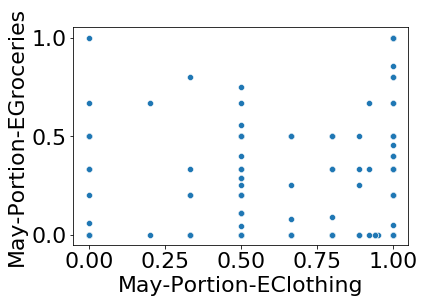

In [810]:
sns.scatterplot(sacog_demo['May-Portion-EClothing'], sacog_demo['May-Portion-EGroceries'])

### Clustering Analysis
#### 1) Clustering by Portion of Online Shopping

In [273]:
# Ordered by the mean of portion of online shopping, high to low
cat = ['ChildcareItems', 'Clothing', 'Medication', 'HomeOffice', 'PreparedFood', 'OtherFood', 'PaperCleaning', 'Groceries' ]

In [9]:
# subset is for initialization of centroids
subset = sacog_demo[~sacog_demo[['May-Portion-E'+cat_ for cat_ in cat]].isna().any(axis = 1)]
subset = subset[['May-Portion-E'+cat_ for cat_ in cat]]
# X is for clustering, contain all 313 records, with nan representing 'no shopping'
X = sacog_demo[['May-Portion-E'+cat_ for cat_ in cat]]

Choose number of clusters

Weight 1

In [10]:
K = range(2, 15)
cost = []
sil = []
for i in K:
    km = kmeans_missing(potential_centroids = subset, n_clusters = i)
    km.fit(X, 10000, 1000, init = 'kmeans++')
    cost.append(km.costs)
    sil.append(km.silhouette(X))

/Users/apple/Desktop/UCB/Qual/PhD idea/dataset/online shopping dataset/script/KMeansMissing.py:129: RuntimeWarning: invalid value encountered in double_scalars
  sil_.append((b - a)/max(a,b))
/Users/apple/Desktop/UCB/Qual/PhD idea/dataset/online shopping dataset/script/KMeansMissing.py:83: RuntimeWarning: Mean of empty slice
  centroids[j] = np.nanmean(data[clusters == j], axis = 0)


Text(0.5,1,'Silhouette score')

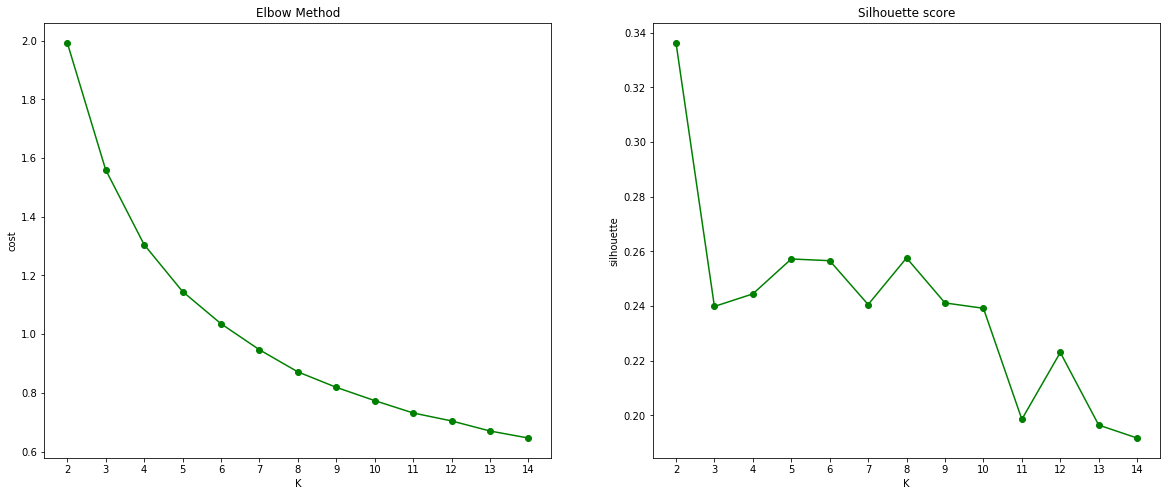

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].plot(K, cost, 'go-')
ax[0].set_xlabel('K')
ax[0].set_ylabel('cost')
ax[0].set_xticks(K)
ax[0].set_title('Elbow Method')

ax[1].plot(K, sil, 'go-')
ax[1].set_xlabel('K')
ax[1].set_ylabel('silhouette')
ax[1].set_xticks(K)
ax[1].set_title('Silhouette score')

Weight 2

In [12]:
K = range(2, 15)
cost = []
sil = []
weight = np.array([1, 3.3, 2.81, 1.79, 5.02, 1.65, 1.65, 10])
for i in K:
    km = kmeans_missing(potential_centroids = subset, n_clusters = i, weight = weight)
    km.fit(X, 10000, 1000, init = 'kmeans++')
    cost.append(km.costs)
    sil.append(km.silhouette(X))

/Users/apple/Desktop/UCB/Qual/PhD idea/dataset/online shopping dataset/script/KMeansMissing.py:129: RuntimeWarning: invalid value encountered in double_scalars
  sil_.append((b - a)/max(a,b))
/Users/apple/Desktop/UCB/Qual/PhD idea/dataset/online shopping dataset/script/KMeansMissing.py:83: RuntimeWarning: Mean of empty slice
  centroids[j] = np.nanmean(data[clusters == j], axis = 0)


Text(0.5,1,'Silhouette score')

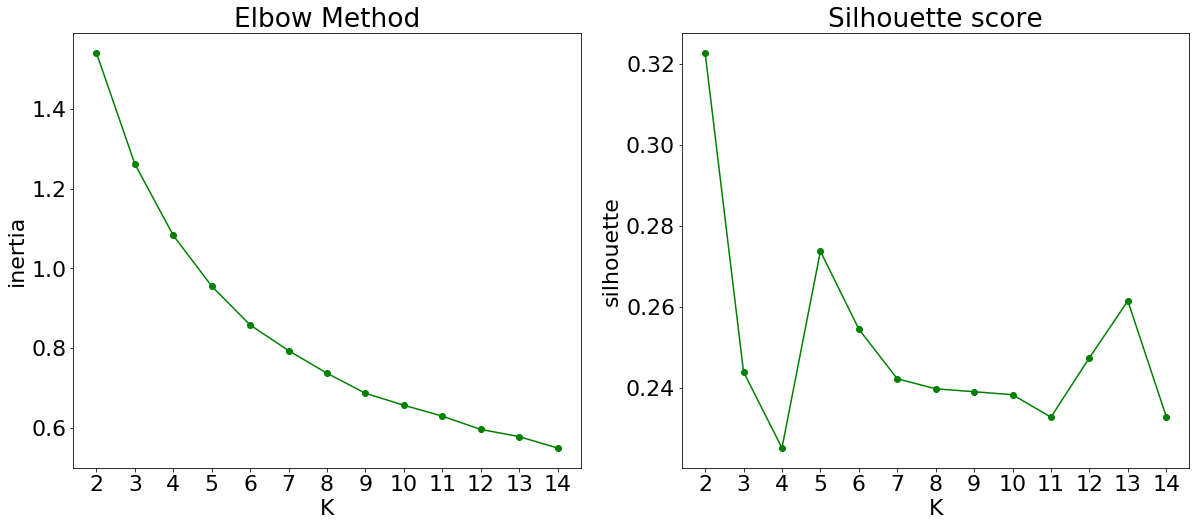

In [446]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].plot(K, cost, 'go-')
ax[0].set_xlabel('K')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(K)
ax[0].set_title('Elbow Method')

ax[1].plot(K, sil, 'go-')
ax[1].set_xlabel('K')
ax[1].set_ylabel('silhouette')
ax[1].set_xticks(K)
ax[1].set_title('Silhouette score')

In [15]:
import random
random.seed(310)
# weight different category based on their popularity among households, which means we put more attention on the 
# categories that satisfy generally needs and allow variation for special products. For example, if you are vary 
#
km5 = kmeans_missing(subset, 5, weight = np.array([1, 3.3, 2.81, 1.79, 5.02, 1.65, 1.65, 10])) 
km5.fit(X, 10000, 10000, init = 'kmeans++')

In [984]:
df = pd.DataFrame(km5.centroids, columns = cat)
df['size'] = np.unique(km5.labels, return_counts = True)[1]
group = ['Partially ECommerce', 'ECommerce Independent','ECommerce Dependent', 'ENonFood & EPrepFood', 'ENonFood']
df.set_index(pd.Index(group), inplace = True)
df = df.loc[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent']]
df.style.background_gradient(subset = cat)

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries,size
ECommerce Independent,0.333333,0.101852,0.130909,0.132479,0.141093,0.0107527,0.0442623,0.00886012,78
ENonFood,0.611111,0.806642,0.794618,0.534722,0.0352808,0.130303,0.137546,0.0314312,57
ENonFood & EPrepFood,0.58836,0.564333,0.331746,0.537329,0.604639,0.276667,0.227788,0.0401494,97
Partially ECommerce,0.557576,0.548698,0.299123,0.401111,0.371522,0.479737,0.310145,0.47273,48
ECommerce Dependent,0.918789,0.910665,0.854696,0.774444,0.713065,0.620635,0.750932,0.735199,33


In [629]:
dict_ = dict(zip(range(5), group))
sacog_demo['labels5'] = km5.labels
sacog_demo['labels5'] = sacog_demo.labels5.map(dict_)

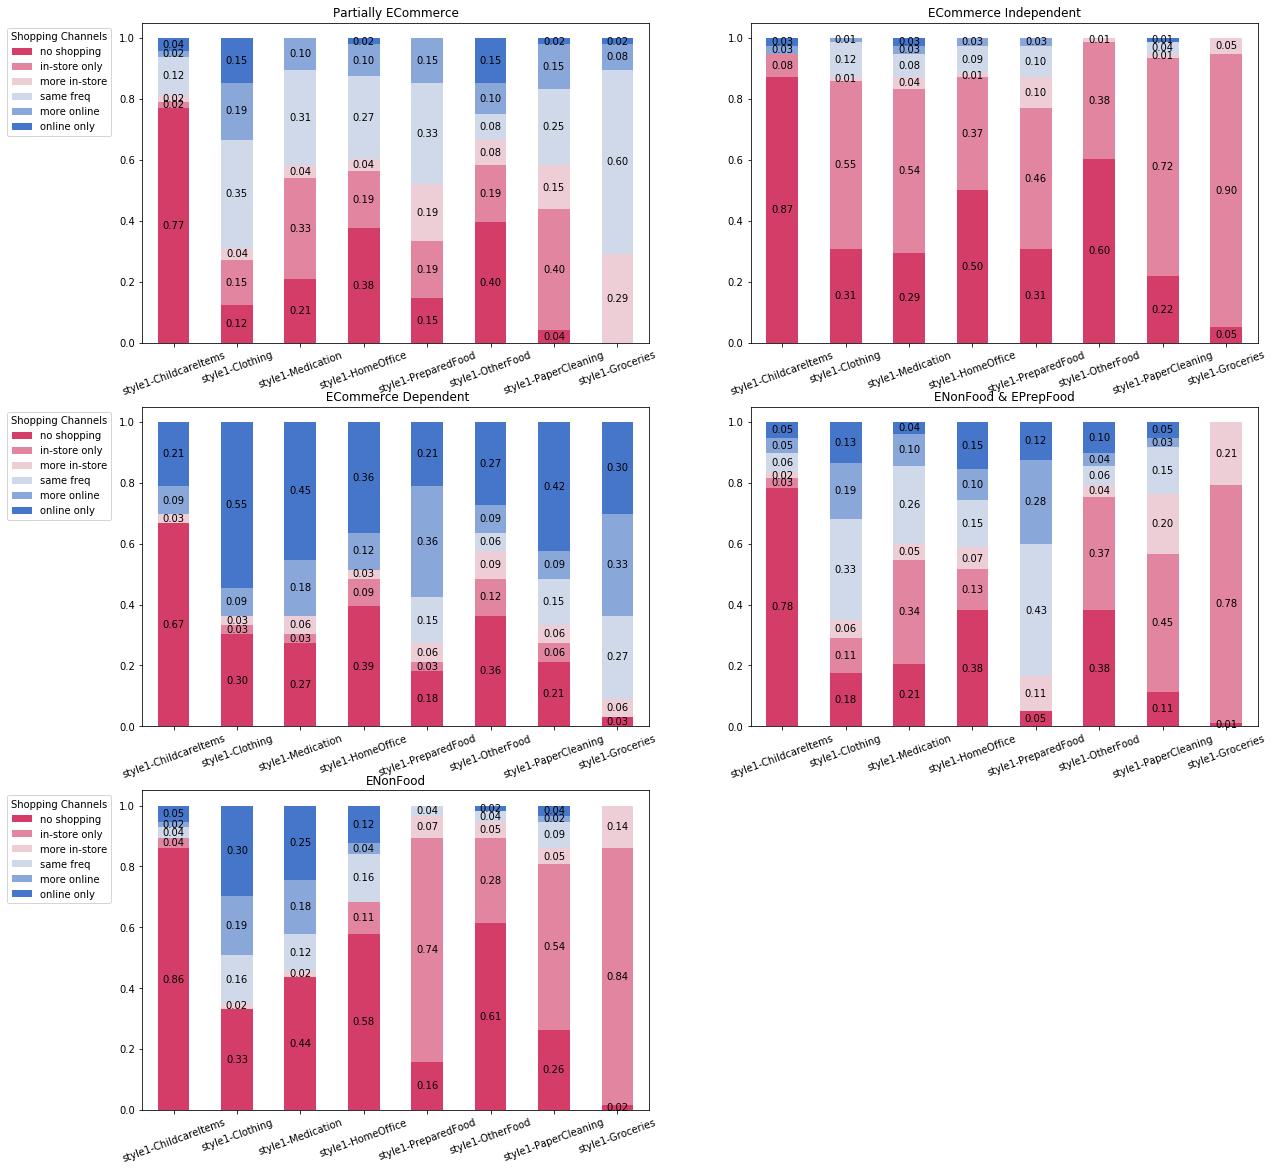

In [28]:
order = pd.Categorical(['no shopping', 'in-store only', 'more in-store', 'same freq', 'more online', 'online only'], ordered = True)
plt.figure(figsize=(20, 20))
for j in range(5):
    plt.subplot(3, 2, j+1)
    df = pd.DataFrame()
    for i in range(8):
        summary = sacog[km5.labels == j]['style1-'+ cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer')
    df.reindex(order).T.plot(kind = 'bar', stacked = True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(0, 255, sep=1, n=6))))
    plt.xticks(rotation=20)
    plt.title(group[j])
    plt.legend(title='Shopping Channels', bbox_to_anchor=(-.05, 1), loc='upper right')
    if j % 2 == 1:
        plt.gca().get_legend().remove()

    for rect in plt.gca().patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

    # plot only when height is greater than specified value
        if height > 0:
            plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

In [985]:
X_May = sacog_demo[['May-Orders-'+ cat_ for cat_ in cat]]
X_Past = sacog_demo[['PastYear-Orders-'+cat_ for cat_ in cat]]
#X_Past = X_Past * (np.mean(X_May).values/np.mean(X_Past).values)
X_Past.columns = cat
X_May.columns = cat

In [986]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_May)
X_May_scaled = scaler.transform(X_May)
X_Past_scaled = scaler.transform(X_Past)
mean_ = pd.DataFrame(X_May_scaled).groupby(sacog_demo.labels5).mean()

In [948]:
pd.DataFrame(X_May_scaled).groupby(sacog_demo.labels5).mean()

,0,1,2,3,4,5,6,7
labels5,,,,,,,,
ECommerce Dependent,0.738838,0.259772,0.758652,0.319140,0.604464,0.492019,0.796143,1.408329
ECommerce Independent,-0.180925,-0.470797,-0.403820,-0.326903,-0.503053,-0.364655,-0.356337,-0.436690
ENonFood,-0.146097,0.189211,0.310325,-0.225030,-0.642554,-0.281893,-0.180045,-0.377377
ENonFood & EPrepFood,-0.028240,0.189845,-0.086451,0.307392,0.558350,-0.002330,-0.061676,-0.368265
Partially ECommerce,0.016612,-0.021881,-0.059174,-0.042155,0.036593,0.593756,0.370139,0.933732


In [845]:
X_May.groupby(sacog_demo.labels5).mean()

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries
labels5,,,,,,,,
ECommerce Dependent,2.939394,3.515152,3.181818,1.454545,6.333333,1.939394,2.818182,7.121212
ECommerce Independent,0.230769,0.179487,0.435897,0.269231,1.051282,0.025641,0.153846,0.089744
ENonFood,0.333333,3.192982,2.122807,0.456140,0.385965,0.210526,0.561404,0.315789
ENonFood & EPrepFood,0.680412,3.195876,1.185567,1.432990,6.113402,0.835052,0.835052,0.350515
Partially ECommerce,0.812500,2.229167,1.250000,0.791667,3.625000,2.166667,1.833333,5.312500


In [951]:
essential = ['PreparedFood', 'Groceries', 'Clothing','PaperCleaning']
def Past_Label(row, df_mean):

    
    if sacog_demo.iloc[row.name]['numkids'] > 0:
        # exclude ECommerce dependent group if never shopped online for any of the category
        if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Never', 'Almost never'])) > 0:
            # exclude Partially ECommerce if never shopped for grocery
            if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-Groceries']].isin(['Never', 'Almost never', 'Less than 1 time per month'])) >0:
                if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-PreparedFood']].isin(['Never', 'Almost never', 'Less than 1 time per month'])) >0:
                    if (sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Never', 'Almost never'])) >= 6) & (sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Less than 1 time per month'])) >= 2):
                        return 'ECommerce Independent'
                    return np.sum((row - df_mean[1:3])**2, axis = 1).idxmin()
                else:
                    return np.sum((row - df_mean[1:4])**2, axis = 1).idxmin()
            
            else:
                return np.sum((row - df_mean[1:])**2, axis = 1).idxmin()
        else:
            return np.sum((row - df_mean)**2, axis = 1).idxmin()
            
    else:
        if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat[1:]]].isin(['Never', 'Almost never'])) > 0:
            if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-Groceries']].isin(['Never', 'Almost never', 'Less than 1 time per month'])) > 0:
                if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-PreparedFood']].isin(['Never', 'Almost never', 'Less than 1 time per month'])) > 0:
                    if (sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Never', 'Almost never'])) >= 6) & (sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Less than 1 time per month'])) >= 2):
                        return 'ECommerce Independent'
                    return np.sum((row[1:] - df_mean[1:3][[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
                else:
                    return np.sum((row[1:] - df_mean[1:4][[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
                
            else:
                return np.sum((row[1:] - df_mean[1:][[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
            #return np.sum((row[1:] - df_mean[1:][[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
            
        else:
            return np.sum((row[1:] - df_mean[[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
    
    


In [873]:
sacog_demo[['May-Portion-E'+cat_ for cat_ in cat]].describe()
#sacog_demo[['May-InStore-Trips-PreparedFood']+['May-InStore-Frequency-PreparedFood']+['May-Trips-PreparedFood']]

,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
count,61.000000,237.000000,226.000000,173.000000,262.000000,163.000000,261.000000,306.000000
mean,0.603570,0.528648,0.398458,0.449491,0.379483,0.286784,0.237002,0.171528
std,0.376244,0.376877,0.379131,0.385008,0.323220,0.390355,0.332885,0.273674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000
75%,1.000000,0.923077,0.666667,0.800000,0.600000,0.500000,0.500000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [900]:
# Result without multiply growth rate and use only essential category for restriction.
past_label1 = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])

labels5,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce,ECommerce Dependent,All
row_0,,,,,,
ECommerce Independent,61,45,64,31,16,217
ENonFood,3,4,11,10,5,33
ENonFood & EPrepFood,3,3,10,2,6,24
Partially ECommerce,8,4,10,5,4,31
ECommerce Dependent,3,1,2,0,2,8
All,78,57,97,48,33,313


In [901]:
method1 = list(sacog_demo[past_label1 == 'ECommerce Independent'][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].index)

In [952]:
# Result with multiplication of growth rate and use all category as restriction
past_label1 = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])

labels5,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce,ECommerce Dependent,All
row_0,,,,,,
ECommerce Independent,45,30,35,15,6,131
ENonFood,13,18,26,13,9,79
ENonFood & EPrepFood,7,4,21,11,7,50
Partially ECommerce,8,4,12,6,6,36
ECommerce Dependent,5,1,3,3,5,17
All,78,57,97,48,33,313


In [888]:
method2 = list(sacog_demo[past_label1 == 'ECommerce Independent'][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].index)

In [941]:
#
mean_ = X_May.groupby(sacog_demo.labels5).mean()
mean_.columns = [0,1,2,3,4,5,6,7]
past_label1 = pd.DataFrame(np.array(X_Past)).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])

labels5,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce,ECommerce Dependent,All
row_0,,,,,,
ECommerce Independent,47,31,30,15,4,127
ENonFood,11,17,24,13,8,73
ENonFood & EPrepFood,7,5,28,11,10,61
Partially ECommerce,1,2,7,6,5,21
ECommerce Dependent,12,2,8,3,6,31
All,78,57,97,48,33,313


In [954]:
df = sacog_demo[['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]]
df['past_label'] = past_label1
df['labels5'] = sacog_demo['labels5']
df

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,past_label,labels5
0,Never,Never,Never,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,ECommerce Independent,Partially ECommerce
1,Never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,About 1 time per week,Never,Less than 1 time per month,Almost never,ENonFood & EPrepFood,ENonFood
2,Never,Never,Never,Never,Never,Never,Never,Never,ECommerce Independent,ECommerce Independent
3,Never,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Never,Less than 1 time per week,Never,ENonFood & EPrepFood,ENonFood & EPrepFood
4,Never,Less than 1 time per month,Less than 1 time per month,Almost never,Less than 1 time per month,Never,Never,Never,ENonFood,ENonFood & EPrepFood
5,Never,Less than 1 time per month,Less than 1 time per month,Almost never,About 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Partially ECommerce,ECommerce Independent
6,Never,Less than 1 time per month,Never,Less than 1 time per month,Less than 1 time per month,Almost never,Less than 1 time per week,Less than 1 time per month,ECommerce Independent,Partially ECommerce
7,Almost never,Almost never,Never,Never,Less than 1 time per week,Almost never,Never,Almost never,ECommerce Independent,ECommerce Independent
8,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,ECommerce Dependent,Partially ECommerce
9,Never,Never,Never,Less than 1 time per month,Never,Never,Almost never,Never,ECommerce Independent,ENonFood & EPrepFood


In [862]:
cat_ = cat[1:]
def Past_Label(row, df_mean):
    if sacog_demo.iloc[row.name]['numkids'] > 0:
        return np.sum((row - df_mean)**2, axis = 1).idxmin()
    else:
        return np.sum((row[1:] - df_mean[[1,2,3,4,5,6,7]])**2, axis = 1).idxmin()
    #impCat = (sacog_demo.iloc[idx][['May-Total-'+_ for _ in cat_]]).index[(sacog_demo.iloc[idx][['May-Total-'+_ for _ in cat_]] > 0).values]
    #impCat = [cat.index(i.split('-')[2]) for i in impCat] 
    
    #if sacog_demo.iloc[idx]['numkids'] > 0:
    #    impCat.append(0)
    
    #if not impCat:
    #    return 'ECommerce Independent'
    #if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat[i] for i in impCat]].isin(['Never', 'Almost never'])) > 0:
    #    return np.sum((row[impCat] - df_mean[1:][impCat])**2, axis = 1).idxmin()
    #return np.sum((row[impCat] - df_mean[impCat])**2, axis = 1).idxmin()


In [772]:
past_label1 = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])

labels5,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce,ECommerce Dependent,All
row_0,,,,,,
ECommerce Independent,45,29,35,15,6,130
ENonFood,13,18,26,13,9,79
ENonFood & EPrepFood,7,5,19,11,7,49
Partially ECommerce,8,4,11,5,5,33
ECommerce Dependent,5,1,6,4,6,22
All,78,57,97,48,33,313


In [840]:
past_label1 = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])

labels5,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce,ECommerce Dependent,All
row_0,,,,,,
ECommerce Independent,61,45,64,31,16,217
ENonFood,3,4,11,10,5,33
ENonFood & EPrepFood,3,3,10,2,6,24
Partially ECommerce,9,4,11,5,5,34
ECommerce Dependent,2,1,1,0,1,5
All,78,57,97,48,33,313


In [773]:
past_label1 = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)
ct = pd.crosstab(past_label1, sacog_demo.labels5, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent', 'All'])
sacog_demo['past_label'] = past_label1

In [379]:
import plotly.graph_objects as go

df = pd.DataFrame({'Past style': past_label1, 
              'May style': sacog_demo.labels5})

fig = go.Figure(data = [go.Sankey(
                        node = dict(
                        pad = 10,
                        thickness = 20,
                        label = ['ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'ENonFood + EPrepFood', 'Partially ECommerce',
                                 'ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'ENonFood + EPrepFood','Partially ECommerce']
                                 
                        ),
                        link = dict(
                            source = [0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5,
                            target = [5,6,7,8,9]*6,
                            value = list(df.groupby('Past style')['May style'].value_counts().sort_index())
                        ))]
               )

fig.update_layout(title_text = 'Dynamic of Shopping Style')
fig.show()

In [492]:
sacog_demo[sacog_demo!=-9998].groupby('labels5')[[
 
 'DoInStage23-ContactlessDoor',
 
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 
 
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
    'COVID-PPEReducesContraction',
 'COVID-PPEReducesTransmission',
 'COVID-AbleSocialDistance'
]].mean().style.background_gradient()

,DoInStage23-ContactlessDoor,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,COVID-PPEReducesContraction,COVID-PPEReducesTransmission,COVID-AbleSocialDistance
labels5,,,,,,,,
ECommerce Dependent,3.90909,3.51515,3.09091,2.48485,2.33333,3.84848,4.48485,4.18182
ECommerce Independent,2.92208,2.76623,2.85714,3.71795,3,3.94805,4.46753,4.28571
ENonFood,2.68421,2.66667,2.75439,3.63158,2.98246,3.92982,4.33333,4.33333
ENonFood & EPrepFood,3.53684,3.68421,3.63158,3.55789,2.91579,4.12371,4.45361,4.26804
Partially ECommerce,3.9375,3.41667,3.27083,3.29167,2.89583,4.10417,4.60417,4.39583


In [486]:
intent = [
 
 'DoInStage23-ContactlessDoor',
 
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 
 
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 ]
Question = [
 
 'Do Contactless Door Delivery',
 
 'Do Curbside Pickup',
 'Do In-store Pickup',
 
 
 'Visit Retail',
 'Visit Restaurant',
 ]
dict_ = dict(zip(intent, Question))
ls = []
for intention in intent:
    df = sacog_demo[sacog_demo != -9998].groupby('labels5')[intention].value_counts().unstack()
    df.columns = ['very unlikely', 'unlikely', 'neutral', 'likely', 'very likely']
    df['question'] = [intention]*5
    df = df.loc[['ECommerce Independent', 'ENonFood', 'ENonFood & EPrepFood', 'Partially ECommerce', 'ECommerce Dependent']]
    ls.append(df)
    
df_ = pd.concat(ls).reset_index()
df_.rename(columns = {'labels5': 'category'}, inplace = True)
df_['subtable'] = ['Shopping Style'] * len(df_)


df_['question'] = df_['question'].map(dict_)


In [488]:
df_.to_csv('../output/future intention.csv')

In [452]:
sacog_demo[sacog_demo!=-9998].groupby('labels5')[['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
 'ECommerce-Food-EnvironmentallyFriendly',
 'ECommerce-Food-SupportLocal',
 'ECommerce-Food-SavesTime',
 'ECommerce-Food-SavesMoney',
 'ECommerce-Food-HardToKnowExactly',
 'ECommerce-Food-WorryAboutTheft',
 'ECommerce-Food-AvoidCarrying',
 'ECommerce-Food-InstantIsCool']].mean().style.background_gradient()

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,ECommerce-Food-EnvironmentallyFriendly,ECommerce-Food-SupportLocal,ECommerce-Food-SavesTime,ECommerce-Food-SavesMoney,ECommerce-Food-HardToKnowExactly,ECommerce-Food-WorryAboutTheft,ECommerce-Food-AvoidCarrying,ECommerce-Food-InstantIsCool
labels5,,,,,,,,,,,,,
ECommerce Dependent,3.87879,3.69697,3.15152,2.93939,2.24242,3.21212,3.9697,3.90909,2.39394,3.84848,2.27273,2.33333,3.51515
ECommerce Independent,2.67532,3.18182,2.87013,3.31169,2.48052,2.72727,3.5974,3.46053,2.23377,3.84416,3.03896,2.05195,2.66234
ENonFood,2.59649,2.92982,2.54386,3.05263,2.22807,2.89474,3.75439,3.40351,2.29825,3.92857,2.77193,2.35088,2.91071
ENonFood & EPrepFood,2.91753,3.75,2.69072,3.21649,2.8866,2.84536,3.70103,3.78125,2.28866,3.8125,2.62887,2.34021,3.16495
Partially ECommerce,3.54167,3.60417,3.20833,3.27083,2.5,2.9375,3.70833,3.97917,2.20833,4.16667,2.58333,2.3125,3.29787


In [504]:
sacog_demo['incomelevel'].value_counts()

High income      132
Unknown           99
Medium income     61
Low income        21
Name: incomelevel, dtype: int64

In [506]:
sacog_demo.groupby('labels5')['incomelevel'].value_counts(normalize = True).unstack()

incomelevel,High income,Low income,Medium income,Unknown
labels5,,,,
ECommerce Dependent,0.333333,0.181818,0.333333,0.151515
ECommerce Independent,0.358974,0.205128,0.333333,0.102564
ENonFood,0.473684,0.192982,0.210526,0.122807
ENonFood & EPrepFood,0.556701,0.113402,0.257732,0.072165
Partially ECommerce,0.479167,0.062500,0.291667,0.166667


In [518]:
sacog_demo.groupby(past_label1)['incomelevel'].value_counts(normalize = True).unstack()

incomelevel,High income,Low income,Medium income,Unknown
ECommerce Dependent,0.411765,0.117647,0.411765,0.058824
ECommerce Independent,0.396947,0.183206,0.267176,0.152672
ENonFood,0.506329,0.139241,0.240506,0.113924
ENonFood & EPrepFood,0.500000,0.120000,0.320000,0.060000
Partially ECommerce,0.527778,0.111111,0.305556,0.055556


In [519]:
sacog_demo.groupby('ageLevel')['labels5'].value_counts(normalize = True).unstack()

labels5,ECommerce Dependent,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce
ageLevel,,,,,
Baby Boomer and Older,0.118519,0.274074,0.214815,0.237037,0.155556
Gen X,0.092593,0.166667,0.203704,0.388889,0.148148
Gen Y & Z,0.096774,0.258065,0.137097,0.354839,0.153226


In [608]:
sacog_demo.groupby('ageLevel')['past_label'].value_counts(normalize = True).unstack()

past_label,ECommerce Dependent,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce
ageLevel,,,,,
Baby Boomer and Older,0.044444,0.429630,0.303704,0.125926,0.096296
Gen X,0.055556,0.481481,0.203704,0.166667,0.092593
Gen Y & Z,0.064516,0.379032,0.217742,0.193548,0.145161


In [764]:
sacog_demo.groupby('incomelevel')['labels5'].value_counts(normalize = True).unstack()

labels5,ECommerce Dependent,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce
incomelevel,,,,,
High income,0.076923,0.195804,0.188811,0.377622,0.160839
Low income,0.127660,0.340426,0.234043,0.234043,0.063830
Medium income,0.125000,0.295455,0.136364,0.284091,0.159091
Unknown,0.142857,0.228571,0.200000,0.200000,0.228571


In [774]:
sacog_demo.groupby('incomelevel')['past_label'].value_counts(normalize = True).unstack()

past_label,ECommerce Dependent,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce
incomelevel,,,,,
High income,0.055944,0.363636,0.279720,0.167832,0.132867
Low income,0.063830,0.510638,0.234043,0.127660,0.063830
Medium income,0.113636,0.397727,0.215909,0.170455,0.102273
Unknown,0.028571,0.542857,0.257143,0.114286,0.057143


In [590]:
sacog_demo[(sacog_demo.past_label == 'ECommerce Independent')].groupby(sacog_demo.labels5)['ageLevel'].value_counts(normalize =True).unstack()

ageLevel,Baby Boomer and Older,Gen X,Gen Y & Z
labels5,,,
ECommerce Dependent,0.333333,0.333333,0.333333
ECommerce Independent,0.533333,0.088889,0.377778
ENonFood,0.433333,0.266667,0.300000
ENonFood & EPrepFood,0.371429,0.228571,0.400000
Partially ECommerce,0.400000,0.266667,0.333333


In [594]:
sacog_demo[(sacog_demo.past_label == 'ENonFood')].groupby(sacog_demo.labels5)['ageLevel'].value_counts(normalize =True).unstack()

ageLevel,Baby Boomer and Older,Gen X,Gen Y & Z
labels5,,,
ECommerce Dependent,0.555556,NaN,0.444444
ECommerce Independent,0.461538,0.153846,0.384615
ENonFood,0.611111,0.166667,0.222222
ENonFood & EPrepFood,0.384615,0.192308,0.423077
Partially ECommerce,0.692308,0.076923,0.230769


In [607]:
sacog_demo[(sacog_demo.past_label == 'ENonFood & EPrepFood') & (sacog_demo['labels5'].isin(['ENonFood']))]['ageLevel'].value_counts(normalize= True)

Gen Y & Z                0.5
Baby Boomer and Older    0.5
Name: ageLevel, dtype: float64

In [522]:
sacog_demo.groupby('ageLevel')['past_label'].value_counts(normalize = True).unstack()

past_label,ECommerce Dependent,ECommerce Independent,ENonFood,ENonFood & EPrepFood,Partially ECommerce
ageLevel,,,,,
Baby Boomer and Older,0.044444,0.429630,0.303704,0.125926,0.096296
Gen X,0.055556,0.481481,0.203704,0.166667,0.092593
Gen Y & Z,0.064516,0.379032,0.217742,0.193548,0.145161


In [508]:
sacog_demo.groupby('labels5')['ageLevel'].value_counts(normalize = True).unstack()

ageLevel,Baby Boomer and Older,Gen X,Gen Y & Z
labels5,,,
ECommerce Dependent,0.484848,0.151515,0.363636
ECommerce Independent,0.474359,0.115385,0.410256
ENonFood,0.508772,0.192982,0.298246
ENonFood & EPrepFood,0.329897,0.216495,0.453608
Partially ECommerce,0.437500,0.166667,0.395833


In [515]:
sacog_demo.groupby(past_label1)['ageLevel'].value_counts(normalize = True).unstack()

ageLevel,Baby Boomer and Older,Gen X,Gen Y & Z
ECommerce Dependent,0.352941,0.176471,0.470588
ECommerce Independent,0.442748,0.198473,0.358779
ENonFood,0.518987,0.139241,0.341772
ENonFood & EPrepFood,0.340000,0.180000,0.480000
Partially ECommerce,0.361111,0.138889,0.500000


In [546]:
sacog_demo.ageLevel.value_counts(normalize = True)

Baby Boomer and Older    0.431310
Gen Y & Z                0.396166
Gen X                    0.172524
Name: ageLevel, dtype: float64

In [562]:
sacog_demo[sacog_demo != -9998].groupby('ageLevel')['Behavior-GroceryExcuseToGetOut',

 'NonFood-RetailExcuseToGetOut',
                'Behavior-NotMindGroceriesOnline',
                              'Behavior-NotMindRestaurantOnline'].mean()

,Behavior-GroceryExcuseToGetOut,NonFood-RetailExcuseToGetOut,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline
ageLevel,,,,
Baby Boomer and Older,3.251852,2.785185,2.777778,3.088889
Gen X,3.148148,3.148148,3.018519,3.518519
Gen Y & Z,3.138211,3.032520,3.227642,3.770492


In [780]:
sacog_demo.groupby('ageLevel')[['May-Orders-'+cat_ for cat_ in cat]].mean()

,May-Orders-ChildcareItems,May-Orders-Clothing,May-Orders-Medication,May-Orders-HomeOffice,May-Orders-PreparedFood,May-Orders-OtherFood,May-Orders-PaperCleaning,May-Orders-Groceries
ageLevel,,,,,,,,
Baby Boomer and Older,0.266667,1.718519,1.540741,0.681481,2.400000,0.992593,1.074074,1.792593
Gen X,0.574074,2.888889,1.555556,0.925926,4.907407,1.240741,0.925926,1.574074
Gen Y & Z,1.387097,2.750000,1.153226,1.048387,3.959677,0.500000,0.895161,1.790323


In [781]:
sacog_demo.groupby('ageLevel')[['May-Total-'+cat_ for cat_ in cat]].mean()

,May-Total-ChildcareItems,May-Total-Clothing,May-Total-Medication,May-Total-HomeOffice,May-Total-PreparedFood,May-Total-OtherFood,May-Total-PaperCleaning,May-Total-Groceries
ageLevel,,,,,,,,
Baby Boomer and Older,0.296296,2.474074,2.992593,1.370370,5.985185,2.555556,2.785185,7.748148
Gen X,0.814815,3.870370,3.000000,1.814815,10.074074,2.833333,2.925926,8.259259
Gen Y & Z,1.927419,3.580645,2.362903,1.645161,8.677419,1.556452,3.032258,7.193548


In [796]:
sacog_demo[sacog_demo!=-9998].groupby('ageLevel')['DoInStage23-CurbsidePickup'].value_counts(normalize=True).unstack()[[4.0,5.0]].sum(axis=1)

ageLevel
Baby Boomer and Older    0.407407
Gen X                    0.574074
Gen Y & Z                0.603306
dtype: float64

In [802]:
sacog_demo[sacog_demo!=-9998].groupby('ageLevel')['Tried-CurbsidePickup'].value_counts(normalize=True).unstack()[[ 'YesSinceSIP']].sum(axis=1)

ageLevel
Baby Boomer and Older    0.385185
Gen X                    0.351852
Gen Y & Z                0.354839
dtype: float64

In [787]:
sacog_demo[sacog_demo!=-9998].groupby('ageLevel')['DoInStage23-InStorePickup'].value_counts(normalize=True)

ageLevel               DoInStage23-InStorePickup
Baby Boomer and Older  1.0                          0.266667
                       4.0                          0.244444
                       3.0                          0.237037
                       5.0                          0.133333
                       2.0                          0.118519
Gen X                  4.0                          0.351852
                       5.0                          0.277778
                       1.0                          0.166667
                       3.0                          0.111111
                       2.0                          0.092593
Gen Y & Z              4.0                          0.322314
                       5.0                          0.247934
                       1.0                          0.190083
                       3.0                          0.165289
                       2.0                          0.074380
Name: DoInStage23-InStorePickup, dty

In [1]:
sum(sacog_demo[sacog_demo.labels5 == 'ENonFood']['DoInStage23-ContactlessDoor'].value_counts(normalize=True).sort_index()[:2])

NameError: name 'sacog_demo' is not defined

In [580]:
sum(sacog_demo[sacog_demo.labels5 == 'ENonFood & EPrepFood']['DoInStage23-InStorePickup'].value_counts(normalize=True).sort_index()[3:])

0.8041237113402062

### Investigate reverse behavior
#### 1) ECommerce Dep
**1.1 to ENonFood & Res**

Household 87 indicate that though in-person is chore, he/she will grocery shopping as an excuse to get out. Also thought it's hard to know what they will get from the delivery orders.

In [306]:
idx = sacog_demo[(past_label1 == 'ECommerce Dependent') & (sacog_demo.labels5 == 'ENonFood & EPrepFood')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]+ ['May-Portion-E'+ cat_ for cat_ in cat]].index 

In [301]:
sacog_demo[(past_label1 == 'ECommerce Dependent') & (sacog_demo.labels5 == 'ENonFood & EPrepFood')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]+ ['May-Portion-E'+ cat_ for cat_ in cat]] 

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
87,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,About 1 time per week,Less than 1 time per week,2 - 3 times per week,NaN,0.000000,0.5,0.000000,1.0,0.0,0.0,0.0
230,Never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,About 1 time per week,Less than 1 time per month,About 1 time per week,About 1 time per week,NaN,0.333333,0.5,0.666667,0.5,0.0,0.5,0.0
303,Less than 1 time per week,More than 5 times per week,2 - 3 times per week,2 - 3 times per week,More than 5 times per week,2 - 3 times per week,More than 5 times per week,More than 5 times per week,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0


In [313]:
sacog_demo.iloc[idx][['Behavior-NotMindGroceriesOnline',

 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',

 'NonFood-RetailExcuseToGetOut',
 
 'ECommerce-Food-EnvironmentallyFriendly',
 'ECommerce-Food-SupportLocal',
 'ECommerce-Food-SavesTime',
 'ECommerce-Food-SavesMoney',
 'ECommerce-Food-HardToKnowExactly',
 'ECommerce-Food-WorryAboutTheft',
 'ECommerce-Food-AvoidCarrying',
 'ECommerce-Food-InstantIsCool',
                     'DoInStage23-BundlingOnlineGroceries',
 'DoInStage23-CrowdSourcedDelivery',
 'DoInStage23-ContactlessCurbside',
 'DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessDriverless',
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-DroneDelivery',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar']]

,Behavior-NotMindGroceriesOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,NonFood-RetailExcuseToGetOut,ECommerce-Food-EnvironmentallyFriendly,ECommerce-Food-SupportLocal,ECommerce-Food-SavesTime,ECommerce-Food-SavesMoney,ECommerce-Food-HardToKnowExactly,ECommerce-Food-WorryAboutTheft,...,DoInStage23-ContactlessCurbside,DoInStage23-ContactlessDoor,DoInStage23-ContactlessDriverless,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-LockerPickup,DoInStage23-DroneDelivery,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,DoInStage23-VisitBar
87,4,4,4,2,3,4,4,3,4,2,...,1,4,1,4,4,1,1,4,4,3
230,5,5,1,3,3,5,5,3,2,1,...,5,5,5,5,5,5,1,5,4,4
303,4,3,3,4,3,4,4,2,2,2,...,4,4,3,1,1,1,1,4,3,3


**1.2 to Partially ECommerce**

In [300]:
sacog_demo[(past_label1 == 'ECommerce Dependent') & (sacog_demo.labels5 == 'Partially ECommerce')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]+ ['May-Portion-E'+ cat_ for cat_ in cat]] 

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
8,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,0.5,0.5,0.500000,1.0,0.500000,0.5,0.333333,0.500000
72,Less than 1 time per month,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.5,0.333333,0.5,0.666667,0.5,0.333333,0.666667
221,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,0.0,1.0,0.000000,NaN,0.000000,1.0,1.000000,1.000000


**1.3 To ECommerce Independent**

Three out of five view grocery shopping as an excuse to get out. Four out of five view retail shopping as an excuse to get out. Might due to quarantine fatigue.

In [316]:
idx = sacog_demo[(past_label1 == 'ECommerce Dependent') & (sacog_demo.labels5 == 'ECommerce Independent')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]].index

In [318]:
sacog_demo.iloc[idx][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
199,Never,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
213,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
232,Never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.000000,0.0,0.0,0.5,NaN,0.0,0.0
262,Almost never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,2 - 3 times per week,About 1 time per week,Less than 1 time per month,2 - 3 times per week,NaN,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
311,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,2 - 3 times per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
sacog_demo.iloc[idx][['May-Employment', 'HouseholdIncome', 'age', 'hhveh'] + 
                      ['DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessCurbside',
 
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar'
                    ]]

,May-Employment,HouseholdIncome,age,hhveh,DoInStage23-ContactlessDoor,DoInStage23-ContactlessCurbside,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-LockerPickup,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,DoInStage23-VisitBar
199,"Single job, fully employed","$75,000 - $99,999",25 - 34,3,4,4,4,4,1,4,4,4
213,"Single job, fully employed","$100,000 - $149,999",25 - 34,2,4,4,2,4,4,4,4,4
232,"Single job, fully employed","$100,000 - $149,999",35 - 44,1,3,1,3,4,1,1,1,1
262,"Single job, fully employed","$150,000 - $199,999",60 - 64,1,5,5,4,4,2,2,1,1
311,"Not employed, not looking for work","$75,000 - $99,999",35 - 44,2,4,4,4,4,1,3,1,1


In [227]:
sacog_demo.iloc[goInd][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
'NonFood-RetailExcuseToGetOut',
  'Attitude-ZoomFatigue',
 'Attitude-SociallyIsolated',
 'Attitude-Stressed',
 'Attitude-HaveEnoughTime' ,
                       'ECommerce-Food-EnvironmentallyFriendly',
 'ECommerce-Food-SupportLocal',
 'ECommerce-Food-SavesTime',
 'ECommerce-Food-SavesMoney',
 'ECommerce-Food-HardToKnowExactly',
 'ECommerce-Food-WorryAboutTheft',
 'ECommerce-Food-AvoidCarrying',
 'ECommerce-Food-InstantIsCool']]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,NonFood-RetailExcuseToGetOut,Attitude-ZoomFatigue,Attitude-SociallyIsolated,Attitude-Stressed,Attitude-HaveEnoughTime,ECommerce-Food-EnvironmentallyFriendly,ECommerce-Food-SupportLocal,ECommerce-Food-SavesTime,ECommerce-Food-SavesMoney,ECommerce-Food-HardToKnowExactly,ECommerce-Food-WorryAboutTheft,ECommerce-Food-AvoidCarrying,ECommerce-Food-InstantIsCool
199,4,4,4,4,4,4,4,3,3,3,4,3,-9998,3,3,4,3,4
213,5,5,2,4,4,4,5,4,2,4,1,4,4,1,2,2,1,4
232,3,4,3,1,1,1,2,2,2,3,3,4,4,2,3,3,2,3
262,3,2,2,3,1,5,3,2,2,2,1,2,3,3,4,1,1,1
311,4,4,4,4,2,4,1,4,4,3,3,4,5,4,4,3,1,3


In [134]:
sacog_demo[(past_label1 == 'ECommerce Dependent') & (sacog_demo.labels5 == 'ECommerce Independent')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
199,Never,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
213,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
232,Never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.000000,0.0,0.0,0.5,NaN,0.0,0.0
262,Almost never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,2 - 3 times per week,About 1 time per week,Less than 1 time per month,2 - 3 times per week,NaN,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
311,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,2 - 3 times per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### 2) Partially ECommerce

**2.1 to ENonFood & EPrepFood**

They are a group of people who did both ECommerce for restaurant food and groceries on a weekly basis in the past. However, during pandemic, they kept their habits to order prepared food online but rely on in-store grocery shopping more. Looking int their attitudes towards grocery shopping, we found that 9 out of 12 households view grocery as an excuse to get out and only 1 household view in-person shopping is chore. It's possible that as an outlet of long-period quarantine, people view shopping as an opportunity to get out of the house.

In [319]:
NoEgro = sacog_demo[(past_label1 == 'Partially ECommerce') & (sacog_demo.labels5 == 'ENonFood & EPrepFood')].index

In [320]:
sacog_demo.iloc[NoEgro][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
20,No Response,65 - 74,Never,Never,Never,Never,About 1 time per week,Never,Never,About 1 time per week,NaN,NaN,NaN,NaN,0.666667,0.0,NaN,NaN
27,No Response,55 - 59,Never,Less than 1 time per week,Never,Never,About 1 time per week,Less than 1 time per month,Less than 1 time per week,Less than 1 time per week,NaN,0.500000,0.000000,NaN,0.500000,0.2,0.000000,0.20
66,"$75,000 - $99,999",65 - 74,Never,Almost never,Never,Almost never,3 - 5 times per week,About 1 time per week,Less than 1 time per week,2 - 3 times per week,NaN,1.000000,0.000000,1.000000,0.571429,0.0,0.200000,0.20
90,No Response,65 - 74,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,Less than 1 time per month,2 - 3 times per week,NaN,0.000000,0.500000,NaN,0.800000,1.0,0.000000,0.00
95,"$50,000 - $74,999",25 - 34,Never,Less than 1 time per week,Never,Never,About 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per week,NaN,1.000000,NaN,NaN,0.666667,1.0,0.000000,0.00
105,"$150,000 - $199,999",45 - 54,Never,Less than 1 time per month,Almost never,Almost never,About 1 time per week,Almost never,Almost never,About 1 time per week,NaN,0.941176,0.000000,0.000000,0.500000,0.0,0.000000,0.00
132,"$200,000 or more",25 - 34,Never,Less than 1 time per month,Never,Never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per week,About 1 time per week,NaN,0.500000,0.000000,NaN,0.333333,1.0,0.000000,0.00
146,"$75,000 - $99,999",35 - 44,Never,Less than 1 time per week,Almost never,Almost never,2 - 3 times per week,Less than 1 time per week,Less than 1 time per week,2 - 3 times per week,NaN,NaN,0.000000,NaN,0.705882,NaN,0.200000,0.25
166,"$100,000 - $149,999",35 - 44,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per month,About 1 time per week,0.333333,0.333333,0.333333,0.333333,0.500000,0.0,0.333333,0.20
191,"$100,000 - $149,999",35 - 44,Almost never,Less than 1 time per month,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Almost never,Less than 1 time per month,2 - 3 times per week,NaN,0.500000,0.333333,0.750000,0.666667,NaN,0.500000,0.00


In [225]:
list(sacog_demo.columns)

['match_id',
 'PersonalIncome',
 'Children-12To18',
 'Children-5To12',
 'Children-Under5',
 'age',
 'May-Employment',
 'May-Employment-Industry',
 'HouseholdIncome',
 'Gender',
 'ethnicity_afam',
 'ethnicity_aiak',
 'ethnicity_asian',
 'ethnicity_hapi',
 'ethnicity_hisp',
 'ethnicity_mideast',
 'ethnicity_multi',
 'ethnicity_noanswer',
 'ethnicity_other',
 'ethnicity_white',
 'Disability-Chronic',
 'Disability-Developmental',
 'Disability-Hearing',
 'Disability-MentalHealth',
 'Disability-None',
 'Disability-Other',
 'Disability-Physical',
 'Disability-Vision',
 'hhveh',
 'numkids',
 'id',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistanc

In [330]:
sacog_demo.iloc[NoEgro][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
                        'ECommerce-Food-HardToKnowExactly',
                        'DoInStage23-BundlingOnlineGroceries',
 ]]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,ECommerce-Food-HardToKnowExactly,DoInStage23-BundlingOnlineGroceries
20,3,3,3,4,3,1
27,5,4,3,4,3,2
66,4,4,3,3,2,1
90,1,1,2,4,5,1
95,4,5,1,5,5,1
105,5,5,3,5,3,1
132,4,4,2,2,4,1
146,1,-9998,1,5,-9998,-9998
166,4,4,4,4,3,1
191,4,4,3,3,3,1


**2.2 to ENonFood**

They all had a high frequency of online shopping for both prepared food and grocery in the past year but did minimum online food shopping in May. Three out of four households indicated that they view grocery shopping as an excuse to get out.

In [322]:
NoEfood = sacog_demo[(past_label1 == 'Partially ECommerce') & (sacog_demo.labels5 == 'ENonFood')].index

In [325]:
sacog_demo.iloc[NoEfood][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
10,"$100,000 - $149,999",35 - 44,Never,About 1 time per week,Less than 1 time per month,Almost never,Less than 1 time per week,Never,Less than 1 time per month,2 - 3 times per week,NaN,0.800000,0.8,NaN,0.00,NaN,0.5,0.0
92,"$100,000 - $149,999",65 - 74,Never,Never,Never,Never,About 1 time per week,About 1 time per week,About 1 time per week,About 1 time per week,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0
234,No Response,35 - 44,Never,Less than 1 time per month,Never,Never,More than 5 times per week,Less than 1 time per week,Never,2 - 3 times per week,NaN,0.888889,0.5,NaN,0.25,0.333333,0.0,0.0
288,Prefer not to answer,60 - 64,Never,Never,Never,Never,About 1 time per week,Never,Never,2 - 3 times per week,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0


In [332]:
sacog_demo.iloc[NoEfood][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
                        'ECommerce-Food-HardToKnowExactly'
                         
 ]]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,ECommerce-Food-HardToKnowExactly
10,1,4,2,5,3,3
92,2,3,2,5,3,5
234,4,5,5,1,1,5
288,3,2,2,4,3,3


**2.3) to ECommerce Ind**

Their original purchase frequency for nonFood items were usually less than 1 time per month. During the pandemic, six out of eight households view grocery shopping as an excuse to get out and also complaint that it's hard to know what you can get from online orders.

In [333]:
NoE = sacog_demo[(past_label1 == 'Partially ECommerce') & (sacog_demo.labels5 == 'ECommerce Independent')].index

In [334]:
sacog_demo.iloc[NoE][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
5,No Response,25 - 34,Never,Less than 1 time per month,Less than 1 time per month,Almost never,About 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,NaN,NaN,0.0,NaN,0.000000,NaN,0.0,0.000000
71,No Response,35 - 44,Almost never,Less than 1 time per month,About 1 time per week,Almost never,About 1 time per week,Almost never,Almost never,About 1 time per week,NaN,NaN,0.0,NaN,0.000000,NaN,0.0,0.000000
79,"$150,000 - $199,999",25 - 34,Almost never,Less than 1 time per month,Almost never,Almost never,Less than 1 time per week,About 1 time per week,Less than 1 time per month,2 - 3 times per week,NaN,0.5,0.0,0.0,0.000000,0.0,0.0,0.285714
89,"$50,000 - $74,999",65 - 74,Never,Less than 1 time per month,Less than 1 time per month,Almost never,2 - 3 times per week,Less than 1 time per week,Less than 1 time per month,About 1 time per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
106,"$100,000 - $149,999",45 - 54,Never,Less than 1 time per week,Less than 1 time per month,Almost never,About 1 time per week,About 1 time per week,Less than 1 time per month,Less than 1 time per week,NaN,0.0,0.0,NaN,0.666667,0.0,0.0,0.000000
130,"$75,000 - $99,999",20 - 24,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,2 - 3 times per week,Never,About 1 time per week,About 1 time per week,NaN,0.0,0.0,0.0,0.000000,NaN,0.0,0.000000
259,No Response,65 - 74,Never,Less than 1 time per month,Almost never,Less than 1 time per month,About 1 time per week,Less than 1 time per week,Less than 1 time per month,About 1 time per week,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.000000
277,"$100,000 - $149,999",45 - 54,Almost never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,Less than 1 time per week,2 - 3 times per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [336]:
list(sacog_demo.columns)

['match_id',
 'PersonalIncome',
 'Children-12To18',
 'Children-5To12',
 'Children-Under5',
 'age',
 'May-Employment',
 'May-Employment-Industry',
 'HouseholdIncome',
 'Gender',
 'ethnicity_afam',
 'ethnicity_aiak',
 'ethnicity_asian',
 'ethnicity_hapi',
 'ethnicity_hisp',
 'ethnicity_mideast',
 'ethnicity_multi',
 'ethnicity_noanswer',
 'ethnicity_other',
 'ethnicity_white',
 'Disability-Chronic',
 'Disability-Developmental',
 'Disability-Hearing',
 'Disability-MentalHealth',
 'Disability-None',
 'Disability-Other',
 'Disability-Physical',
 'Disability-Vision',
 'hhveh',
 'numkids',
 'id',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistanc

In [337]:
sacog_demo.iloc[NoE][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
                      'NonFood-RetailExcuseToGetOut',
                        'ECommerce-Food-HardToKnowExactly',
                      'ECommerce-NonFood-HardToKnowExactly',
 'ECommerce-NonFood-WorryAboutTheft'
                         
 ]]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,NonFood-RetailExcuseToGetOut,ECommerce-Food-HardToKnowExactly,ECommerce-NonFood-HardToKnowExactly,ECommerce-NonFood-WorryAboutTheft
5,2,3,1,4,1,3,4,5,4
71,5,5,4,4,4,4,5,4,4
79,2,1,2,5,5,5,5,2,2
89,2,2,2,4,3,3,4,3,3
106,4,4,4,2,2,3,3,3,4
130,5,5,4,2,2,4,2,2,4
259,2,1,3,4,3,3,4,4,2
277,2,2,4,4,4,4,4,4,4


#### 3) ENonFood & EPrepFood

**3.1 to NonFood**

In [341]:
NoRes = sacog_demo[(past_label1 == 'ENonFood & EPrepFood') & (sacog_demo.labels5 == 'ENonFood')].index

In [342]:
sacog_demo.iloc[NoRes][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
1,No Response,55 - 59,Never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,About 1 time per week,Never,Less than 1 time per month,Almost never,NaN,0.8,0.666667,0.5,0.0,0.0,0.0,0.000000
156,"$200,000 or more",25 - 34,Never,About 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Almost never,Less than 1 time per month,Never,NaN,1.0,1.000000,1.0,0.5,0.0,0.0,0.000000
177,Prefer not to answer,45 - 54,Less than 1 time per month,Less than 1 time per month,Almost never,Less than 1 time per month,Less than 1 time per month,Never,Less than 1 time per month,Less than 1 time per month,0.5,1.0,0.500000,0.5,0.0,0.0,0.5,0.333333
247,"$150,000 - $199,999",35 - 44,Less than 1 time per week,Less than 1 time per week,Almost never,Never,2 - 3 times per week,Never,Less than 1 time per month,Never,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.000000
294,No Response,75 - 84,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,Almost never,Less than 1 time per month,NaN,1.0,1.000000,1.0,0.2,1.0,1.0,0.200000


In [345]:
avg = sacog_demo.groupby('labels5')[['May-Portion-E'+ cat_ for cat_ in cat]].mean()

In [349]:
sacog_demo.iloc[NoRes][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
                      'NonFood-RetailExcuseToGetOut',
                        'ECommerce-Food-HardToKnowExactly',
                      'ECommerce-NonFood-HardToKnowExactly',
 'ECommerce-NonFood-WorryAboutTheft'
                         
 ]]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,NonFood-RetailExcuseToGetOut,ECommerce-Food-HardToKnowExactly,ECommerce-NonFood-HardToKnowExactly,ECommerce-NonFood-WorryAboutTheft
1,4,3,2,4,2,4,3,3,2
156,3,4,2,5,5,4,3,4,3
177,4,3,4,4,3,4,4,4,2
247,2,2,3,4,1,3,5,5,3
294,4,4,4,2,1,2,2,2,1


**3.2 To no online**

In [350]:
NoE = sacog_demo[(past_label1 == 'ENonFood & EPrepFood') & (sacog_demo.labels5 == 'ECommerce Independent')].index

In [352]:
sacog_demo.iloc[NoE][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
17,No Response,60 - 64,Never,Less than 1 time per month,Almost never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Almost never,NaN,0.0,0.0,0.0,0.500000,0.333333,0.0,0.000000
59,"$150,000 - $199,999",60 - 64,Never,Never,Never,Never,About 1 time per week,Never,Never,Never,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,0.000000
84,"$100,000 - $149,999",65 - 74,Never,Never,Never,Never,About 1 time per week,Never,Never,Never,NaN,0.0,NaN,0.0,0.666667,0.000000,NaN,0.000000
85,"$150,000 - $199,999",55 - 59,Never,Never,Never,Never,About 1 time per week,Never,Never,Never,NaN,0.0,0.0,0.0,0.500000,0.000000,0.0,0.058824
291,"$75,000 - $99,999",35 - 44,Almost never,Less than 1 time per month,Never,Less than 1 time per month,2 - 3 times per week,Less than 1 time per month,Almost never,Almost never,NaN,0.0,NaN,NaN,0.333333,0.000000,0.0,0.000000
293,"$15,000 - $24,999",25 - 34,Never,Less than 1 time per week,Never,Less than 1 time per month,About 1 time per week,Never,Less than 1 time per week,Never,NaN,0.0,0.0,NaN,0.000000,NaN,0.0,0.000000
306,"$100,000 - $149,999",45 - 54,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Never,Almost never,Almost never,NaN,0.0,0.0,0.0,0.500000,NaN,0.0,0.000000


In [354]:
sacog_demo.iloc[NoE][['Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut',
                      'NonFood-RetailExcuseToGetOut',
                        'ECommerce-Food-HardToKnowExactly',
                      'ECommerce-NonFood-HardToKnowExactly',
 'ECommerce-NonFood-WorryAboutTheft'
                         
 ]]

,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut,NonFood-RetailExcuseToGetOut,ECommerce-Food-HardToKnowExactly,ECommerce-NonFood-HardToKnowExactly,ECommerce-NonFood-WorryAboutTheft
17,3,4,2,4,4,4,3,4,3
59,4,4,5,2,3,1,3,3,5
84,4,5,3,2,2,2,3,2,1
85,1,4,1,5,3,2,3,4,4
291,3,5,3,3,3,3,4,4,3
293,4,4,2,4,2,4,5,5,4
306,4,4,4,3,4,3,4,4,4


### 4) ENonFood

**4.1 to ECommerce Independent**

In [355]:
NoE = sacog_demo[(past_label1 == 'ENonFood') & (sacog_demo.labels5 == 'ECommerce Independent')].index

In [356]:
sacog_demo.iloc[NoE][['HouseholdIncome', 'age']+['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,HouseholdIncome,age,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
41,"$200,000 or more",65 - 74,Almost never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,Almost never,Almost never,Less than 1 time per month,Almost never,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
102,"$25,000 - $49,999",25 - 34,Never,Less than 1 time per week,Less than 1 time per month,Almost never,Less than 1 time per month,Never,Almost never,Never,NaN,0.000000,0.666667,0.000000,0.285714,NaN,1.0,0.000000
103,No Response,65 - 74,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Never,Never,Never,Never,NaN,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
111,No Response,35 - 44,Never,Less than 1 time per week,Less than 1 time per week,Never,Never,Never,Never,Never,NaN,0.000000,0.500000,0.000000,0.000000,NaN,0.0,0.000000
183,Prefer not to answer,45 - 54,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Never,Never,Never,Never,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,0.000000
192,"$75,000 - $99,999",35 - 44,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Almost never,Less than 1 time per month,Almost never,Almost never,Never,0.666667,0.333333,0.333333,NaN,0.200000,NaN,0.0,0.000000
194,"$100,000 - $149,999",45 - 54,Never,Almost never,Less than 1 time per week,Almost never,Never,Almost never,Never,Never,NaN,0.000000,NaN,NaN,0.000000,0.0,0.0,0.000000
272,"$25,000 - $49,999",60 - 64,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Never,Never,Less than 1 time per month,Never,NaN,NaN,0.000000,0.000000,0.000000,0.0,NaN,0.000000
275,"Under $10,000",35 - 44,Never,Less than 1 time per week,Almost never,Never,Almost never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,NaN,NaN,0.000000,NaN,0.000000,0.0,0.0,0.000000
279,"$100,000 - $149,999",60 - 64,Almost never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Almost never,Almost never,Less than 1 time per month,Almost never,NaN,0.000000,0.666667,0.666667,0.000000,NaN,0.5,0.000000


In [359]:
np.nansum((sacog_demo.iloc[297][['May-Portion-E'+ cat_ for cat_ in cat]] - sacog_demo.groupby('labels5')[['May-Portion-E'+ cat_ for cat_ in cat]].mean())**2,axis=1)

array([2.26262524, 0.28882939, 0.70880414, 0.44882286, 0.53893852])

In [374]:
idx = sacog_demo[(np.sum(sacog_demo[['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Never', 'Almost never']), axis = 1) == 4) & (np.sum(sacog_demo[['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]].isin(['Less than 1 time per month']), axis = 1) == 4)].index

In [375]:
past_label1[idx]

0      ECommerce Independent
30                  ENonFood
43                  ENonFood
45                  ENonFood
82                  ENonFood
91                  ENonFood
121    ECommerce Independent
150                 ENonFood
159    ECommerce Independent
172                 ENonFood
184                 ENonFood
192                 ENonFood
236    ECommerce Independent
272                 ENonFood
279                 ENonFood
297                 ENonFood
301                 ENonFood
312                 ENonFood
dtype: object

Try different number of groups

6 Groups

In [13]:
import random
random.seed(310)
km6 = kmeans_missing(subset, 6)
km6.fit(X, 10000, 10000, init = 'kmeans++')

In [30]:
df = pd.DataFrame(km6.centroids, columns = cat)
df['group size'] = np.unique(km6.labels, return_counts = True)[1]
group = ['ECommerce Independent', 'ECommerce Dependent', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ENonFood','ENonFood + Res']
df.set_index(pd.Index(group), inplace = True)
df.style.background_gradient(subset = cat)

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries,group size
ECommerce Independent,0.333333,0.0918367,0.115033,0.147619,0.111273,0.0128205,0.0438596,0.00375107,73
ECommerce Dependent,0.748918,0.880952,0.773504,0.822222,0.646858,0.725,0.842158,0.923687,19
Partially ECommerce Level1,0.5625,0.708195,0.308081,0.488923,0.489789,0.356014,0.294143,0.287516,37
Partially ECommerce Level2,0.727053,0.57094,0.473661,0.541667,0.474317,0.507692,0.415725,0.534591,44
ENonFood,0.731481,0.790068,0.797593,0.515152,0.0331884,0.0982456,0.109665,0.0168581,54
ENonFood + Res,0.597661,0.525539,0.37131,0.483962,0.590441,0.245912,0.216741,0.00645629,86


In [32]:
dict_ = dict(zip(range(6), group))
sacog_demo['labels'] = km6.labels
sacog_demo['labels'] = sacog_demo['labels'].map(dict_)

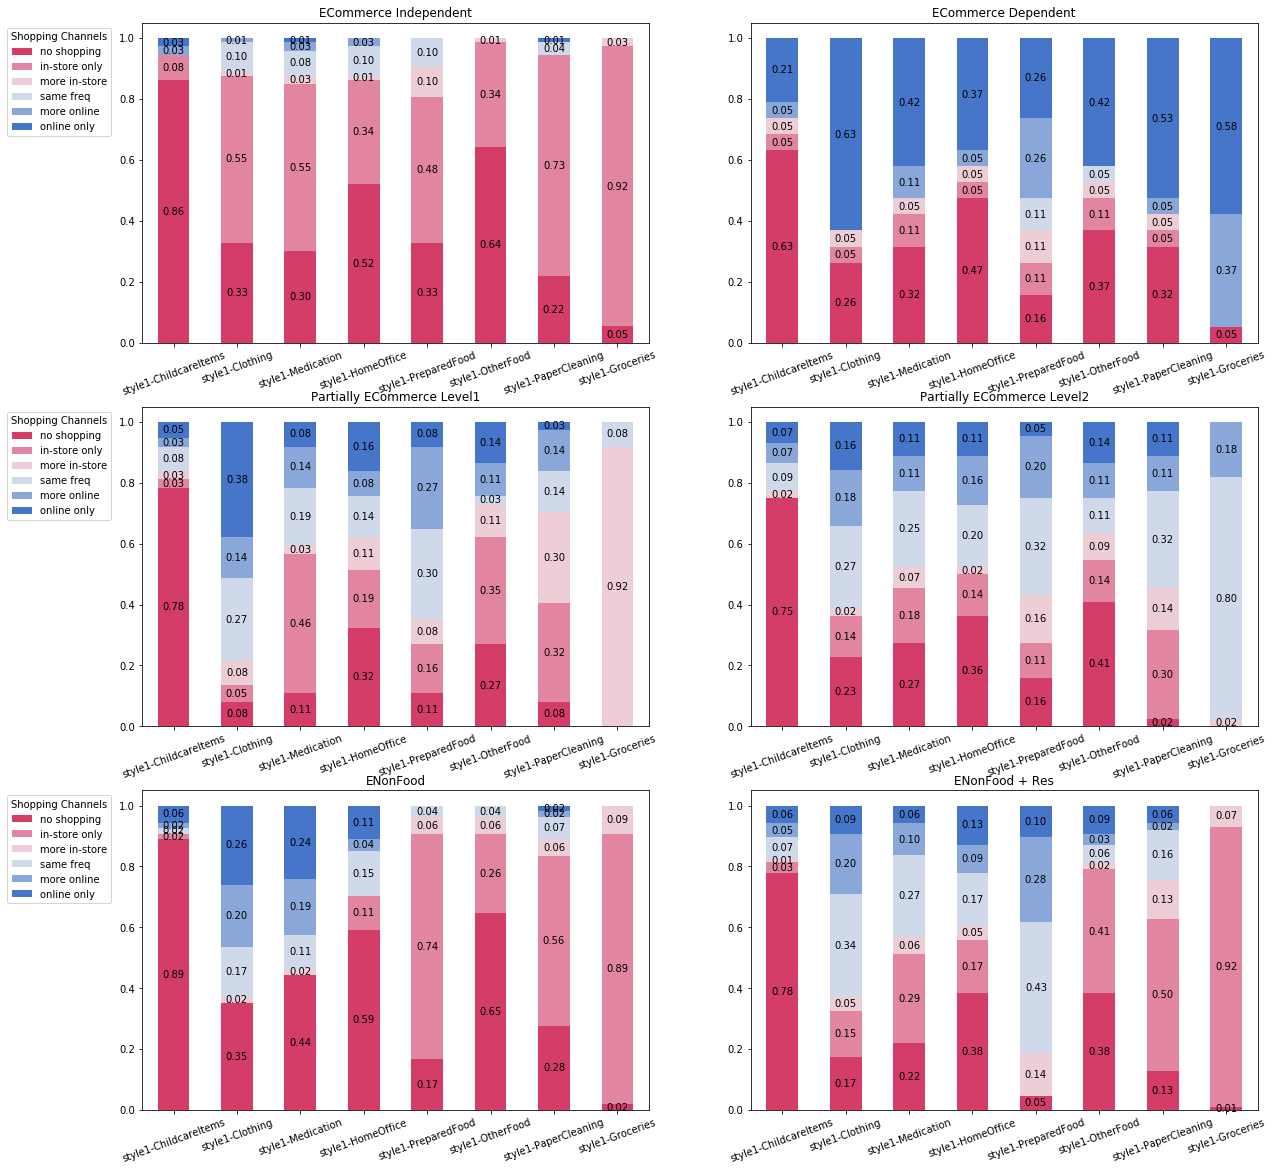

In [51]:
order = pd.Categorical(['no shopping', 'in-store only', 'more in-store', 'same freq', 'more online', 'online only'], ordered = True)
plt.figure(figsize=(20, 20))
for j in range(6):
    plt.subplot(3, 2, j+1)
    df = pd.DataFrame()
    for i in range(8):
        summary = sacog[km6.labels == j]['style1-'+ cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer')
    df.reindex(order).T.plot(kind = 'bar', stacked = True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(0, 255, sep=1, n=6))))
    plt.xticks(rotation=20)
    plt.title(group[j])
    plt.legend(title='Shopping Channels', bbox_to_anchor=(-.05, 1), loc='upper right')
    if j % 2 == 1:
        plt.gca().get_legend().remove()

    for rect in plt.gca().patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

    # plot only when height is greater than specified value
        if height > 0:
            plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

In [56]:
def past_label()

Never                         158
Almost never                   63
Less than 1 time per month     32
About 1 time per week          22
Less than 1 time per week      22
2 - 3 times per week           14
3 - 5 times per week            1
More than 5 times per week      1
Name: PastYear-ECommerce-Frequency-Groceries, dtype: int64

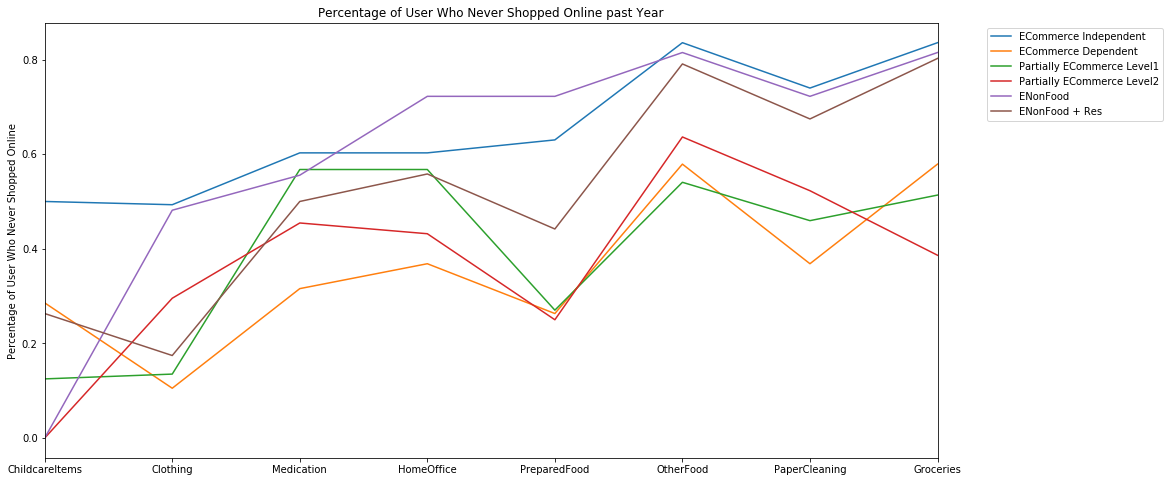

In [99]:
order = pd.Categorical(['Never', 'Almost never','Less than 1 time per month', 'Less than 1 time per week', 'About 1 time per week', '2 - 3 times per week', '3 - 5 times per week', 'More than 5 times per week'], ordered=True)
df_ = pd.DataFrame()
for j in range(6):
    df = pd.DataFrame()
    # For childcareItems, infer whether they have the needs by looking at whether they conduct shopping or not in 2020
    summary = sacog[(km6.labels ==j) & (sacog['style1-ChildcareItems']!='no shopping')]['PastYear-ECommerce-Frequency-ChildcareItems'].value_counts(normalize = True).to_frame()
    df = df.join(summary, how='outer')
    
    for i in range(1,8):
        summary = sacog[km6.labels == j]['PastYear-ECommerce-Frequency-'+cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer') 
        
    df_[group[j]] = df.loc[['Never', 'Almost never']].sum(axis=0)
    
df_.set_index(pd.Index(cat), inplace = True)
plt.figure(figsize = (16, 8))
df_.plot(kind = 'line', ax = plt.gca())
plt.ylabel('Percentage of User Who Never Shopped Online')
plt.title('Percentage of User Who Never Shopped Online past Year')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

In [160]:
df = pd.DataFrame()
for i in range(8):
        summary = sacog['PastYear-ECommerce-Frequency-'+cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer') 
df.loc[['Never', 'Almost never']].sum()

PastYear-ECommerce-Frequency-ChildcareItems    0.808307
PastYear-ECommerce-Frequency-Clothing          0.309904
PastYear-ECommerce-Frequency-Medication        0.523962
PastYear-ECommerce-Frequency-HomeOffice        0.568690
PastYear-ECommerce-Frequency-PreparedFood      0.476038
PastYear-ECommerce-Frequency-OtherFood         0.741214
PastYear-ECommerce-Frequency-PaperCleaning     0.632588
PastYear-ECommerce-Frequency-Groceries         0.706070
dtype: float64

In [192]:
np.array(1/df.loc[['Never', 'Almost never']].sum())

array([1.23715415, 3.22680412, 1.90853659, 1.75842697, 2.10067114,
       1.34913793, 1.58080808, 1.41628959])

#### 2) Normalize the counts before calculating distance

In [174]:
X_May = sacog_demo[['May-Orders-'+ cat_ for cat_ in cat]]
X_Past = sacog_demo[['PastYear-Orders-'+cat_ for cat_ in cat]]
X_Past = X_Past * (np.mean(X_May).values/np.mean(X_Past).values)
X_Past.columns = cat
X_May.columns = cat

In [175]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_May)
X_May_scaled = scaler.transform(X_May)
X_Past_scaled = scaler.transform(X_Past)
mean_ = pd.DataFrame(X_May_scaled).groupby(sacog_demo.labels).mean()

In [193]:
def Past_Label(row, df_mean):
    #if sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat[1:]]].isin(['Never', 'Almost never'])) > 0:
    #    return np.sum((row - df_mean[1:])**2, axis = 1).idxmin()
    #elif sum(sacog_demo.iloc[row.name][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat[1:]]].isin(['Never', 'Almost never'])) > 0:
    #return np.sum((row - df_mean)**2, axis = 1).idxmin()
    #return df_mean.index[np.dot((row - df_mean)**2, np.array([0.1, 2, 0.5, 0.5, 2, 0.1, 0.8, 2])).argmin()]
    return df_mean.index[np.dot((row - df_mean)**2, np.array(1/df.loc[['Never', 'Almost never']].sum())).argmin()]
    
past_label = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)

In [194]:
past_label.value_counts()

ECommerce Independent         114
ENonFood                       80
ENonFood + Res                 46
Partially ECommerce Level1     27
ECommerce Dependent            24
Partially ECommerce Level2     22
dtype: int64

In [37]:
sacog_demo.labels.value_counts()

ENonFood + Res                86
ECommerce Independent         73
ENonFood                      54
Partially ECommerce Level2    44
Partially ECommerce Level1    37
ECommerce Dependent           19
Name: labels, dtype: int64

In [187]:
X_Past.groupby(past_label).mean().style.background_gradient()

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries
ECommerce Dependent,1.4557,4.39906,3.40635,2.02147,8.09093,3.03832,3.73822,14.1479
ECommerce Independent,0.347384,0.537928,0.379762,0.393064,0.557995,0.166737,0.12874,0.100919
ENonFood,0.847277,3.13485,2.0748,0.977866,0.500154,0.626281,0.547057,0.216607
ENonFood + Res,0.599407,2.24453,1.47843,0.894027,8.19487,0.488224,0.816754,0.284948
Partially ECommerce Level1,2.13062,6.02479,1.61111,1.62466,5.53345,2.07495,2.72356,2.745
Partially ECommerce Level2,0.326949,1.4176,1.59216,0.647399,13.0965,2.47163,2.63874,7.40865


In [179]:
X_Past.groupby(past_label).mean().style.background_gradient()

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries
ECommerce Dependent,3.8907,8.83636,6.57333,4.40231,9.56962,5.1355,6.40838,10.98
ECommerce Independent,0.297757,0.77103,0.138095,0.294798,0.732369,0.0972633,0.171653,0.100919
ENonFood,0.7205,2.80165,2.36296,0.873475,0.650995,0.345825,0.435137,0.159477
ENonFood + Res,0.988114,2.36529,1.67556,1.2578,8.81013,0.484155,0.85445,0.394706
Partially ECommerce Level1,0.555814,4.81983,0.515556,1.10058,4.81736,2.64556,1.97592,2.31441
Partially ECommerce Level2,1.34983,2.1804,2.04381,0.988274,8.81633,2.04531,2.56335,9.36529


In [172]:
X_May.groupby(sacog_demo.labels).mean().style.background_gradient()

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries
labels,,,,,,,,
ECommerce Dependent,1.68421,2.57895,2.36842,1.42105,4.42105,1.84211,2.15789,7.21053
ECommerce Independent,0.246575,0.164384,0.383562,0.287671,0.739726,0.0273973,0.150685,0.0273973
ENonFood,0.333333,2.92593,2.14815,0.444444,0.388889,0.203704,0.425926,0.203704
ENonFood + Res,0.709302,3.02326,1.34884,1.19767,5.96512,0.662791,0.686047,0.0697674
Partially ECommerce Level1,0.540541,4,1.16216,1.2973,5,1.89189,1.75676,3
Partially ECommerce Level2,2.04545,2.31818,1.97727,1.11364,5.06818,2,2.43182,6.40909


In [41]:
ct = pd.crosstab(past_label, sacog_demo.labels, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All'])

labels,ECommerce Independent,ENonFood,ENonFood + Res,Partially ECommerce Level1,Partially ECommerce Level2,ECommerce Dependent,All
row_0,,,,,,,
ECommerce Independent,39,26,25,10,9,3,112
ENonFood,16,17,27,6,9,6,81
ENonFood + Res,6,4,18,7,8,2,45
Partially ECommerce Level1,3,2,8,5,11,1,30
Partially ECommerce Level2,5,2,3,4,3,3,20
ECommerce Dependent,4,3,5,5,4,4,25
All,73,54,86,37,44,19,313


In [186]:
ct = pd.crosstab(past_label, sacog_demo.labels, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All'])

labels,ECommerce Independent,ENonFood,ENonFood + Res,Partially ECommerce Level1,Partially ECommerce Level2,ECommerce Dependent,All
row_0,,,,,,,
ECommerce Independent,42,28,22,10,9,1,112
ENonFood,14,17,28,7,10,6,82
ENonFood + Res,6,3,22,6,9,5,51
Partially ECommerce Level1,2,2,5,6,12,3,30
Partially ECommerce Level2,5,2,4,2,3,1,17
ECommerce Dependent,4,2,5,6,1,3,21
All,73,54,86,37,44,19,313


In [195]:
ct = pd.crosstab(past_label, sacog_demo.labels, margins = True)[['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All']]
ct.reindex(['ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2', 'ECommerce Dependent', 'All'])

labels,ECommerce Independent,ENonFood,ENonFood + Res,Partially ECommerce Level1,Partially ECommerce Level2,ECommerce Dependent,All
row_0,,,,,,,
ECommerce Independent,42,26,24,10,9,3,114
ENonFood,13,17,27,7,10,6,80
ENonFood + Res,6,3,19,7,9,2,46
Partially ECommerce Level1,3,3,7,4,9,1,27
Partially ECommerce Level2,6,2,4,4,3,3,22
ECommerce Dependent,3,3,5,5,4,4,24
All,73,54,86,37,44,19,313


In [183]:
sacog_demo[(past_label == 'ECommerce Dependent') & (sacog_demo.labels == 'ENonFood')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
170,About 1 time per week,2 - 3 times per week,About 1 time per week,About 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,About 1 time per week,1.0,0.888889,1.0,0.5,0.0,NaN,0.666667,0.25


In [101]:
sacog_demo[(past_label == 'ECommerce Dependent')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
8,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,0.500000,0.500000,0.500000,1.000000,0.500000,0.5,0.333333,0.500000
10,Never,About 1 time per week,Less than 1 time per month,Almost never,Less than 1 time per week,Never,Less than 1 time per month,2 - 3 times per week,NaN,0.800000,0.800000,NaN,0.000000,NaN,0.500000,0.000000
15,Never,Never,About 1 time per week,Never,About 1 time per week,About 1 time per week,Never,Less than 1 time per week,NaN,1.000000,0.000000,NaN,0.000000,1.0,NaN,0.500000
33,Never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Almost never,About 1 time per week,Less than 1 time per month,About 1 time per week,NaN,1.000000,1.000000,0.000000,0.800000,0.0,NaN,0.400000
47,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,About 1 time per week,2 - 3 times per week,0.941176,0.923077,0.857143,0.666667,0.666667,0.2,0.476190,0.666667
71,Almost never,Less than 1 time per month,About 1 time per week,Almost never,About 1 time per week,Almost never,Almost never,About 1 time per week,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
79,Almost never,Less than 1 time per month,Almost never,Almost never,Less than 1 time per week,About 1 time per week,Less than 1 time per month,2 - 3 times per week,NaN,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.285714
80,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per week,2 - 3 times per week,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
87,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,About 1 time per week,Less than 1 time per week,2 - 3 times per week,NaN,0.000000,0.500000,0.000000,1.000000,0.0,0.000000,0.000000
90,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,Less than 1 time per month,2 - 3 times per week,NaN,0.000000,0.500000,NaN,0.800000,1.0,0.000000,0.000000


In [100]:
sacog_demo[(past_label == 'ECommerce Dependent') & (sacog_demo.labels == 'Partially ECommerce Level2')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
8,Less than 1 time per month,About 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week,0.500000,0.500000,0.500000,1.000000,0.500000,0.5,0.333333,0.500000
15,Never,Never,About 1 time per week,Never,About 1 time per week,About 1 time per week,Never,Less than 1 time per week,NaN,1.000000,0.000000,NaN,0.000000,1.0,NaN,0.500000
47,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,About 1 time per week,2 - 3 times per week,0.941176,0.923077,0.857143,0.666667,0.666667,0.2,0.476190,0.666667
251,Never,Less than 1 time per month,Less than 1 time per week,Less than 1 time per month,About 1 time per week,Never,Less than 1 time per week,About 1 time per week,NaN,0.000000,0.500000,0.800000,0.250000,NaN,0.000000,0.500000


In [98]:
sacog_demo[(past_label == 'Partially ECommerce Level2') ][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
5,Never,Less than 1 time per month,Less than 1 time per month,Almost never,About 1 time per week,Less than 1 time per month,Less than 1 time per month,About 1 time per week,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000
23,About 1 time per week,Less than 1 time per month,Less than 1 time per week,Almost never,Less than 1 time per month,Almost never,Less than 1 time per week,Less than 1 time per week,0.500000,NaN,NaN,NaN,0.000000,0.500000,0.500000,0.500000
35,Never,Less than 1 time per month,Never,Never,Less than 1 time per month,Never,Less than 1 time per month,About 1 time per week,NaN,NaN,0.000000,NaN,0.800000,NaN,NaN,1.000000
66,Never,Almost never,Never,Almost never,3 - 5 times per week,About 1 time per week,Less than 1 time per week,2 - 3 times per week,NaN,1.000000,0.000000,1.000000,0.571429,0.000000,0.200000,0.200000
72,Less than 1 time per month,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,Less than 1 time per week,NaN,0.500000,0.333333,0.500000,0.666667,0.500000,0.333333,0.666667
89,Never,Less than 1 time per month,Less than 1 time per month,Almost never,2 - 3 times per week,Less than 1 time per week,Less than 1 time per month,About 1 time per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
92,Never,Never,Never,Never,About 1 time per week,About 1 time per week,About 1 time per week,About 1 time per week,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
96,Less than 1 time per week,Less than 1 time per week,Almost never,Almost never,About 1 time per week,Never,Less than 1 time per week,Less than 1 time per week,0.888889,0.800000,0.800000,NaN,0.500000,0.000000,1.000000,0.090909
113,Never,Almost never,Never,Less than 1 time per month,Never,Never,About 1 time per week,About 1 time per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
130,Never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,2 - 3 times per week,Never,About 1 time per week,About 1 time per week,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000


In [96]:
sacog_demo[(past_label == 'Partially ECommerce Level1') & (sacog_demo.labels == 'ENonFood + Res')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+ cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
20,Never,Never,Never,Never,About 1 time per week,Never,Never,About 1 time per week,NaN,NaN,NaN,NaN,0.666667,0.0,NaN,NaN
95,Never,Less than 1 time per week,Never,Never,About 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per week,NaN,1.000000,NaN,NaN,0.666667,1.0,0.0,0.0
105,Never,Less than 1 time per month,Almost never,Almost never,About 1 time per week,Almost never,Almost never,About 1 time per week,NaN,0.941176,0.0,0.0,0.500000,0.0,0.0,0.0
106,Never,Less than 1 time per week,Less than 1 time per month,Almost never,About 1 time per week,About 1 time per week,Less than 1 time per month,Less than 1 time per week,NaN,0.000000,0.0,NaN,0.666667,0.0,0.0,0.0
110,Less than 1 time per week,More than 5 times per week,Never,Less than 1 time per week,Less than 1 time per week,Almost never,About 1 time per week,Less than 1 time per week,1.0,1.000000,0.0,1.0,0.333333,0.0,1.0,0.0
151,Never,Almost never,Almost never,Less than 1 time per week,Never,About 1 time per week,Less than 1 time per month,Almost never,NaN,0.800000,0.0,0.8,NaN,0.5,0.2,0.0
163,Never,Less than 1 time per month,Almost never,Almost never,Never,About 1 time per week,Almost never,Never,NaN,0.500000,NaN,NaN,0.500000,0.5,0.0,0.0
209,Never,Less than 1 time per month,Almost never,Less than 1 time per month,About 1 time per week,Less than 1 time per week,Less than 1 time per month,Less than 1 time per week,NaN,0.800000,NaN,1.0,0.500000,0.5,0.5,0.0


In [86]:
sacog_demo[(sacog_demo[['PastYear-ECommerce-Frequency-'+ cat_ for cat_ in cat]].isin(['Never', 'Almost never'])).all(1)]

,match_id,PersonalIncome,Children-12To18,Children-5To12,Children-Under5,age,May-Employment,May-Employment-Industry,HouseholdIncome,Gender,...,PastYear-Tried-PreparedFood,PastYear-Tried-Groceries,PastYear-Tried-OtherFood,PastYear-Tried-PaperCleaning,PastYear-Tried-Clothing,PastYear-Tried-HomeOffice,PastYear-Tried-Medication,PastYear-Tried-ChildcareItems,labels4,labels
2,2,"$10,000 - $14,999",-9998,-9998,-9998,55 - 59,"Unable to work, receiving monetary assistance",No Response,No Response,Female,...,0,0,0,0,0,0,0,0,ENonFood,ECommerce Independent
11,11,"$25,000 - $49,999",-9998,-9998,-9998,65 - 74,Retired,No Response,No Response,Female,...,0,0,0,0,0,0,0,0,ENonFood,ENonFood
12,12,"$50,000 - $74,999",1,0,0,45 - 54,"Single job, fully employed",Retail trade,"$50,000 - $74,999",Female,...,0,0,0,0,0,0,0,0,Partially ECommerce,Partially ECommerce Level2
21,22,"$25,000 - $49,999",-9998,-9998,-9998,25 - 34,"Single job, fully employed",Property Mgmt,"$75,000 - $99,999",Male,...,0,0,0,0,0,0,0,0,ENonFood,ENonFood
22,23,"$25,000 - $49,999",1,0,0,65 - 74,Retired,No Response,"$25,000 - $49,999",Male,...,0,0,0,0,0,0,0,0,ENonFood,ECommerce Independent
46,47,"$10,000 - $14,999",-9998,-9998,-9998,35 - 44,"Not employed, looking for work",No Response,"$10,000 - $14,999",Female,...,0,0,0,0,0,0,0,0,ECommerce Dependent,ENonFood + Res
48,49,"$50,000 - $74,999",-9998,-9998,-9998,65 - 74,"Single job, fully employed",mental health,"$75,000 - $99,999",Male,...,0,0,0,0,0,0,0,0,ECommerce Dependent,ENonFood + Res
49,50,"$100,000 - $149,999",-9998,-9998,-9998,25 - 34,"Single job, fully employed",Service,"$150,000 - $199,999",Female,...,0,0,0,0,0,0,0,0,ECommerce Dependent,ENonFood + Res
56,57,"$75,000 - $99,999",-9998,-9998,-9998,65 - 74,Retired,No Response,No Response,Male,...,0,0,0,0,0,0,0,0,ENonFood,ECommerce Independent
63,65,No Response,0,0,2,35 - 44,No Response,No Response,No Response,Prefer not to answer,...,0,0,0,0,0,0,0,0,ECommerce Independent,ECommerce Independent


In [89]:
sacog_demo[]

['ChildcareItems', 'Clothing', 'Medication', 'HomeOffice']

In [91]:
sacog_demo[~((sacog_demo[['PastYear-ECommerce-Frequency-'+ cat_ for cat_ in cat[:4]]].isin(['Never', 'Almost never'])).all(1)) &
          ((sacog_demo[['PastYear-ECommerce-Frequency-'+ cat_ for cat_ in cat[4:]]].isin(['Never', 'Almost never'])).all(1))]

,match_id,PersonalIncome,Children-12To18,Children-5To12,Children-Under5,age,May-Employment,May-Employment-Industry,HouseholdIncome,Gender,...,PastYear-Tried-PreparedFood,PastYear-Tried-Groceries,PastYear-Tried-OtherFood,PastYear-Tried-PaperCleaning,PastYear-Tried-Clothing,PastYear-Tried-HomeOffice,PastYear-Tried-Medication,PastYear-Tried-ChildcareItems,labels4,labels
9,9,Prefer not to answer,-9998,-9998,-9998,65 - 74,Retired,No Response,No Response,Female,...,0,0,0,0,0,1,0,0,Partially ECommerce,Partially ECommerce Level1
14,14,Prefer not to answer,-9998,-9998,-9998,60 - 64,Retired,No Response,No Response,Female,...,0,0,0,0,1,0,1,0,ENonFood,ECommerce Independent
24,25,"$200,000 or more",-9998,-9998,-9998,45 - 54,"Single job, fully employed",law enforcement,"$200,000 or more",Male,...,0,0,0,0,1,0,1,0,ECommerce Dependent,ENonFood + Res
31,32,"$25,000 - $49,999",-9998,-9998,-9998,25 - 34,"Multiple jobs, fully employed",Nonprofit association,No Response,Female,...,0,0,0,0,1,0,0,0,ENonFood,ENonFood
45,46,"$200,000 or more",-9998,-9998,-9998,65 - 74,Retired,No Response,"$200,000 or more",Female,...,0,0,0,0,1,1,1,1,ECommerce Dependent,ENonFood
51,52,"$25,000 - $49,999",-9998,-9998,-9998,75 - 84,Retired,No Response,No Response,Female,...,0,0,0,0,1,0,1,1,ECommerce Dependent,ENonFood
55,56,Prefer not to answer,0,0,0,65 - 74,Retired,No Response,Prefer not to answer,Female,...,0,0,0,0,1,1,0,1,ECommerce Independent,ECommerce Independent
57,58,"$100,000 - $149,999",-9998,-9998,-9998,60 - 64,Retired,No Response,No Response,Male,...,0,0,0,0,1,1,1,0,ENonFood,ENonFood
58,59,"Under $10,000",0,1,1,35 - 44,"Not employed, not looking for work",No Response,"$50,000 - $74,999",Female,...,0,0,0,0,1,0,0,1,ENonFood,ENonFood
60,62,"$100,000 - $149,999",-9998,-9998,-9998,60 - 64,"Single job, fully employed",State Regulatory Agency,"$100,000 - $149,999",Male,...,0,0,0,0,1,0,1,1,ENonFood,ENonFood


In [93]:
sacog_demo[~((sacog_demo[['PastYear-ECommerce-Frequency-'+ cat_ for cat_ in cat[:4]]].isin(['Never', 'Almost never'])).all(1)) &
          ((sacog_demo[['PastYear-ECommerce-Frequency-'+ cat_ for cat_ in cat[5:]]].isin(['Never', 'Almost never'])).all(1)) &
          (~(sacog_demo['PastYear-ECommerce-Frequency-PreparedFood'].isin(['Never', 'Almost never'])))]

,match_id,PersonalIncome,Children-12To18,Children-5To12,Children-Under5,age,May-Employment,May-Employment-Industry,HouseholdIncome,Gender,...,PastYear-Tried-PreparedFood,PastYear-Tried-Groceries,PastYear-Tried-OtherFood,PastYear-Tried-PaperCleaning,PastYear-Tried-Clothing,PastYear-Tried-HomeOffice,PastYear-Tried-Medication,PastYear-Tried-ChildcareItems,labels4,labels
4,4,"$100,000 - $149,999",-9998,-9998,-9998,25 - 34,"Single job, fully employed",Energy/utilities,"$100,000 - $149,999",Female,...,1,0,0,0,1,0,1,0,ECommerce Dependent,ENonFood + Res
16,16,"$15,000 - $24,999",-9998,-9998,-9998,20 - 24,"Single job, fully employed",Education,"$200,000 or more",Male,...,1,0,0,0,1,0,0,0,Partially ECommerce,Partially ECommerce Level1
19,19,"$150,000 - $199,999",0,0,0,45 - 54,"Single job, fully employed",Insurance,"$200,000 or more",Female,...,1,0,0,0,1,0,0,0,Partially ECommerce,Partially ECommerce Level2
29,30,"$100,000 - $149,999",-9998,-9998,-9998,35 - 44,"Single job, fully employed",Law,No Response,Male,...,1,0,0,0,1,0,0,0,ECommerce Dependent,ENonFood + Res
42,43,"$75,000 - $99,999",-9998,-9998,-9998,35 - 44,"Single job, fully employed",natural resources,No Response,Female,...,1,0,0,0,1,0,1,0,ECommerce Dependent,ENonFood + Res
43,44,"$50,000 - $74,999",-9998,-9998,-9998,75 - 84,"Single job, part-time",Grand Jury,No Response,Female,...,1,0,0,0,1,1,1,0,ENonFood,ENonFood
44,45,"$15,000 - $24,999",-9998,-9998,-9998,55 - 59,"Single job, part-time",Energy,"$100,000 - $149,999",Female,...,1,0,0,0,1,1,0,0,ECommerce Dependent,ENonFood + Res
52,53,"$75,000 - $99,999",-9998,-9998,-9998,65 - 74,Retired,No Response,"$75,000 - $99,999",Female,...,1,0,0,0,1,1,1,0,Partially ECommerce,Partially ECommerce Level2
62,64,"$50,000 - $74,999",-9998,-9998,-9998,45 - 54,"Single job, fully employed",Real Estate-Property Management,"$75,000 - $99,999",Female,...,1,0,0,0,1,0,0,0,ECommerce Independent,ECommerce Dependent
70,72,"$75,000 - $99,999",0,0,0,45 - 54,"Single job, fully employed",Social Services,"$150,000 - $199,999",Female,...,1,0,0,0,1,1,1,0,ECommerce Dependent,ENonFood + Res


In [54]:
sacog_demo[(past_label == 'ECommerce Dependent') & (sacog_demo.labels == 'ECommerce Independent')][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat] + ['May-Portion-E'+cat_ for cat_ in cat]]


,PastYear-ECommerce-Frequency-ChildcareItems,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Groceries,May-Portion-EChildcareItems,May-Portion-EClothing,May-Portion-EMedication,May-Portion-EHomeOffice,May-Portion-EPreparedFood,May-Portion-EOtherFood,May-Portion-EPaperCleaning,May-Portion-EGroceries
71,Almost never,Less than 1 time per month,About 1 time per week,Almost never,About 1 time per week,Almost never,Almost never,About 1 time per week,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0
213,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,About 1 time per week,Less than 1 time per week,Less than 1 time per week,About 1 time per week,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
262,Almost never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per month,2 - 3 times per week,About 1 time per week,Less than 1 time per month,2 - 3 times per week,NaN,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
277,Almost never,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,About 1 time per week,Almost never,Less than 1 time per week,2 - 3 times per week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [50]:
import plotly.graph_objects as go

df = pd.DataFrame({'Past style': past_label, 
              'May style': sacog_demo.labels})

fig = go.Figure(data = [go.Sankey(
                        node = dict(
                        pad = 10,
                        thickness = 20,
                        label = ['ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2',
                                 'ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'ENonFood + Res', 'Partially ECommerce Level1', 'Partially ECommerce Level2']
                                 
                        ),
                        link = dict(
                            source = [0]*6 + [1]*6 + [2]*6 + [3]*6 + [4]*6 + [5]*6 ,
                            target = [6,7,8,9,10,11]*6,
                            value = list(df.groupby('Past style')['May style'].value_counts().sort_index())
                        ))]
               )

fig.update_layout(title_text = 'Dynamic of Shopping Style')
fig.show()

In [42]:
sacog_demo[sacog_demo != -9998].groupby('labels')[[
 
 'DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessCurbside',
 
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar',

 ]].mean().style.background_gradient()

,DoInStage23-ContactlessDoor,DoInStage23-ContactlessCurbside,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-LockerPickup,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,DoInStage23-VisitBar
labels,,,,,,,,
ECommerce Dependent,3.94737,2.63158,3.26316,2.73684,1.84211,2.31579,2.05263,1.42105
ECommerce Independent,2.86111,2.27778,2.72222,2.84722,2.16667,3.75342,3.05479,1.91781
ENonFood,2.59259,1.92593,2.61111,2.72222,2.12963,3.62963,2.98148,2.01852
ENonFood + Res,3.56471,2.72941,3.72941,3.67059,2.68235,3.57647,2.8,2.09412
Partially ECommerce Level1,3.83333,2.88889,3.63889,3.58333,2.25,3.47222,3.13889,2.16667
Partially ECommerce Level2,3.86364,2.5,3.36364,3.09091,1.97727,3,2.79545,2


In [398]:
#import plot_likert
intention = ['DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessCurbside',
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar']
likert_dict = {1:'very unlikely', 2: 'unlikely', 3: 'neutral', 4: 'likely', 5: 'very likely'}
data = sacog_demo[sacog_demo.labels == 'ECommerce Dependent'][intention]
for i in intention:
    data[i] = data[i].map(likert_dict)


In [401]:
another_scale = ['very unlikely','unlikely','neutral','likely','very likely']


In [315]:
sacog_demo[sacog_demo != -9998].groupby('ageLevel')[[
 
 'DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessCurbside',
 
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar',

 ]].mean().style.background_gradient()

,DoInStage23-ContactlessDoor,DoInStage23-ContactlessCurbside,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-LockerPickup,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,DoInStage23-VisitBar
ageLevel,,,,,,,,
Baby Boomer and Older,3.14074,2.12593,2.88148,2.85926,2.14074,3.53333,2.93333,1.76296
Gen X,3.46296,2.51852,3.44444,3.48148,2.25926,3.61111,3.16667,2.25926
Gen Y & Z,3.47934,2.81818,3.47107,3.36364,2.40496,3.30328,2.70492,2.13115


### Four groups

In [18]:
km4 = kmeans_missing(subset, 4)
km4.fit(X, 10000, 10000, init = 'kmeans++')

In [19]:
df = pd.DataFrame(km4.centroids, columns = cat)
df['group size'] = np.unique(km4.labels, return_counts = True)[1]
group = ['ECommerce Independent', 'ENonFood', 'ECommerce Dependent', 'Partially ECommerce']
df.set_index(pd.Index(group), inplace = True)
df.style.background_gradient()

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries,group size
ECommerce Independent,0.79836,0.839811,0.730159,0.792593,0.622836,0.704444,0.754545,0.855055,30
ENonFood,0.430159,0.287062,0.29254,0.208333,0.0725466,0.0206349,0.0419797,0.00699941,111
ECommerce Dependent,0.589947,0.59657,0.396871,0.548974,0.577238,0.264583,0.226723,0.0273939,108
Partially ECommerce,0.651442,0.631292,0.435256,0.472108,0.439491,0.437596,0.358106,0.428283,64


In [20]:
sacog_demo['labels4'] = km4.labels
dict_ = dict(zip(range(4), group))
sacog_demo['labels4'] = sacog_demo.labels4.map(dict_)

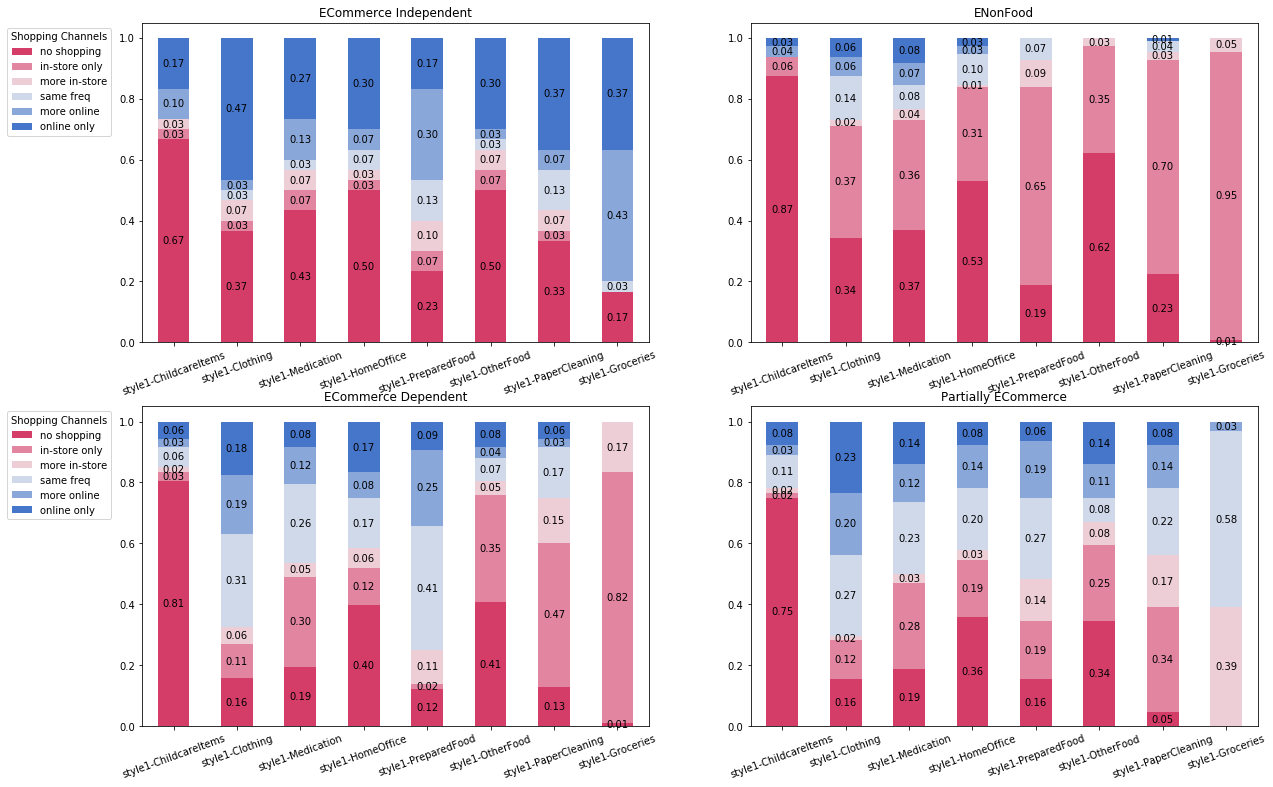

In [21]:
order = pd.Categorical(['no shopping', 'in-store only', 'more in-store', 'same freq', 'more online', 'online only'], ordered = True)
plt.figure(figsize=(20, 20))
for j in range(4):
    plt.subplot(3, 2, j+1)
    df = pd.DataFrame()
    for i in range(8):
        summary = sacog[km4.labels == j]['style1-'+ cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer')
    df.reindex(order).T.plot(kind = 'bar', stacked = True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(0, 255, sep=1, n=6))))
    plt.xticks(rotation=20)
    plt.title(group[j])
    plt.legend(title='Shopping Channels', bbox_to_anchor=(-.05, 1), loc='upper right')
    if j % 2 == 1:
        plt.gca().get_legend().remove()

    for rect in plt.gca().patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

    # plot only when height is greater than specified value
        if height > 0:
            plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)

In [58]:
X_May = sacog_demo[['May-Orders-'+ cat_ for cat_ in cat]]
X_Past = sacog_demo[['PastYear-Orders-'+cat_ for cat_ in cat]]
X_Past = X_Past * (np.mean(X_May).values/np.mean(X_Past).values)
X_Past.columns = cat
X_May.columns = cat

In [60]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_May)
X_May_scaled = scaler.transform(X_May)
X_Past_scaled = scaler.transform(X_Past)
mean_ = pd.DataFrame(X_May_scaled).groupby(sacog_demo.labels4).mean()

In [61]:
def Past_Label(row, df_mean):
    return np.sum((row - df_mean)**2, axis = 1).idxmin()

past_label = pd.DataFrame(X_Past_scaled).apply(lambda x: Past_Label(x, mean_), axis = 1)

In [64]:
pd.crosstab(past_label, sacog_demo.labels4, margins = True)

labels4,ECommerce Dependent,ECommerce Independent,ENonFood,Partially ECommerce,All
row_0,,,,,
ECommerce Dependent,9,12,9,9,39
ECommerce Independent,10,72,40,29,151
ENonFood,10,15,35,13,73
Partially ECommerce,5,14,9,22,50
All,34,113,93,73,313


In [79]:
import plotly.graph_objects as go

df = pd.DataFrame({'Past style': past_label, 
              'May style': sacog_demo.labels4})

fig = go.Figure(data = [go.Sankey(
                        node = dict(
                        pad = 10,
                        thickness = 20,
                        label = ['ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'Partially ECommerce',
                                 'ECommerce Dependent', 'ECommerce Independent', 'ENonFood', 'Partially ECommerce']
                                 
                        ),
                        link = dict(
                            source = [0]*4 + [1]*4 + [2]*4 + [3]*4,
                            target = [4,5,6,7]*6,
                            value = list(df.groupby('Past style')['May style'].value_counts().sort_index())
                        ))]
               )

fig.update_layout(title_text = 'Dynamic of Shopping Style')
fig.show()

### Five groups

In [197]:
import random
random.seed(310)
km5 = kmeans_missing(subset, 5)
km5.fit(X, 10000, 10000, init = 'kmeans++')

In [198]:
df = pd.DataFrame(km5.centroids, columns = cat)
df['group size'] = np.unique(km5.labels, return_counts = True)[1]
group = ['ECommerce Independent', 'Partially ECommerce PrepFood', 'Partially ECommerce Grocery', 'ECommerce Dependent','ENonFood']
df.set_index(pd.Index(group), inplace = True)
df.style.background_gradient(subset = cat)

,ChildcareItems,Clothing,Medication,HomeOffice,PreparedFood,OtherFood,PaperCleaning,Groceries,group size
ECommerce Independent,0.798178,0.875356,0.744544,0.813492,0.59882,0.704444,0.759171,0.862904,28
Partially ECommerce PrepFood,0.731481,0.780326,0.815993,0.565333,0.0561141,0.143333,0.133583,0.0195264,57
Partially ECommerce Grocery,0.638942,0.611337,0.422667,0.45891,0.453397,0.423879,0.349906,0.441561,62
ECommerce Dependent,0.584444,0.565526,0.311111,0.503801,0.60414,0.268966,0.232246,0.0338754,92
ENonFood,0.333333,0.0865385,0.13642,0.13964,0.148501,0.0114943,0.0409836,0.00349762,74


In [27]:
order = pd.Categorical(['no shopping', 'in-store only', 'more in-store', 'same freq', 'more online', 'online only'], ordered = True)
plt.figure(figsize=(20, 20))
for j in range(6):
    plt.subplot(3, 2, j+1)
    df = pd.DataFrame()
    for i in range(8):
        summary = sacog[km6.labels == j]['style1-'+ cat[i]].value_counts(normalize = True).to_frame()
        df = df.join(summary, how='outer')
    df.reindex(order).T.plot(kind = 'bar', stacked = True, ax = plt.gca(), color=tuple(list(sns.diverging_palette(0, 255, sep=1, n=6))))
    plt.xticks(rotation=20)
    plt.title(group[j])
    plt.legend(title='Shopping Channels', bbox_to_anchor=(-.05, 1), loc='upper right')
    if j % 2 == 1:
        plt.gca().get_legend().remove()

    for rect in plt.gca().patches:
    # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.2f}'  # f'{height:.2f}' to format decimal values
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

    # plot only when height is greater than specified value
        if height > 0:
            plt.gca().text(label_x, label_y, label_text, ha='center', va='center', fontsize=10)